## Esercizio 11.1

Questo esercizio costituisce un semplice esempio di Supervised Learning, tecnica in cui forniamo alla macchina un dataset costituito da variabili dipendenti e dalle rispettive variabili indipendenti, e un modello che deve essere ottimizzato. La bontà dell'ottimizzazione viene valutata attraverso una funzione costo.
Il dataset è formato da dati distribuiti linearmente con l'aggiunta di un certo rumore, e viene usato un singolo layer formato da un solo neurone come modello. Come funzione costo scegliamo la somma degli errori quadratici medi. Sappiamo già che un signolo neurone esegue una sovrepposizione lineare degli input secondo opportuni pesi, a cui somma un bias. nel nostro caso, dove l'input è singolo: $y=wx+b$, per cui il modello sappiamo già essere certamente opportuno per fittare i dati sperimentali.

Ho usato il codice fornito nel jupiter notebook dell'esercitazione corrente per osservare come cambia la loss con il numero di epoche, mantenendo fisse le dimensioni del set di dati per training e validazione, composto da 550 dati, e il rumore, a deviazione standard di 0.05. Ho notato che poco dopo le 20 epoche la loss si stabilizza a un valore costante. Dopo di che ho provato a variare la deviazione standard del rumore e il numero di dati, ripetendo ogni volta l'ottimizzazione, con 20 epoche.

In [1]:
import numpy as np

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from keras import backend, activations
from keras import optimizers, losses, metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
#from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

C:\Users\Utente\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Utente\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Utente\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Utente\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [3]:
nsigma = 20
ndata = 10
loss = np.empty((nsigma, ndata))
val_loss = np.empty((nsigma, ndata))
coeffang = np.empty((nsigma, ndata))
bias = np.empty((nsigma, ndata))
sigma = 0.05 # noise standard deviation, for the moment it is absent
ntrain = 50
nvalid = 5

for i in range(nsigma):
    for j in range(ndata):
                    # generate training inputs
            
        model = tf.keras.Sequential()
        model.add(Dense(1, input_shape=(1,)))

        # compile the model choosing optimizer, loss and metrics objects
        model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
        
        np.random.seed(0)
        x_train = np.random.uniform(-1, 1, (j+1)*ntrain)
        x_valid = np.random.uniform(-1, 1, (j+1)*nvalid)
        x_valid.sort()
        y_target = m * x_valid + b # ideal (target) linear function
                
        y_train = np.random.normal(m * x_train + b, (i+1)*sigma) # actual measures from which we want to guess regression parameters
        y_valid = np.random.normal(m * x_valid + b, (i+1)*sigma)
        
        history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=20, shuffle=True, validation_data=(x_valid, y_valid))
        
        #score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
        val_loss_ = history.history['val_loss']
        loss_ = history.history['loss']
        val_loss[i][j] = val_loss_[-1]
        loss[i][j] = loss_[-1]
        # return weights and biases
        coeff = model.get_weights()
        coeffang[i][j] = coeff[0]
        bias[i][j] = coeff[1]
        print('sigma:')
        print((i+1)*sigma)
        print('ntrain:')
        print((j+1)*ntrain)
        print('val_loss:')
        print(val_loss_[-1])
        x_train = []
        x_valid = []
        y_target = []
        y_train = []
        y_valid = []
        keras.backend.clear_session()
        

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 50 samples, validate on 5 samples
Epoch 1/20
50/50 [==============================] - 0s 2ms/sample - loss: 1.7984 - mean_squared_error: 1.7984 - val_loss: 1.5444 - val_mean_squared_error: 1.5444
Epoch 2/20
50/50 [==============================] - 0s 180us/sample - loss: 1.6845 - mean_squared_error: 1.6845 - val_loss: 1.4507 - val_mean_squared_error: 1.4507
Epoch 3/20
50/50 [==============================] - 0s 120us/sample - loss: 1.5786 - mean_squared_error: 1.5786 - val_loss: 1.3686 - val_mean_squared_error: 1.3686
Epoch 4/20
50/50 [==============================] - 0s 180us/sample - loss: 1.4826 - mean_squared_error: 1.4826 - val_loss: 1.2901 - val_mean_squared_error: 1.2901
Epoch 5/20
50/50 [==============================] - 0s 140us/sample - loss: 1.3911 - mean_squared_error: 1.3911 - val_loss: 1.2147 - val_mean_squared_error: 1.2147
Epoch 6/20
50/50 [===

150/150 [==============================] - 0s 87us/sample - loss: 2.1664 - mean_squared_error: 2.1664 - val_loss: 2.6138 - val_mean_squared_error: 2.6138
Epoch 7/20
150/150 [==============================] - 0s 67us/sample - loss: 1.9883 - mean_squared_error: 1.9883 - val_loss: 2.4006 - val_mean_squared_error: 2.4006
Epoch 8/20
150/150 [==============================] - 0s 127us/sample - loss: 1.8318 - mean_squared_error: 1.8318 - val_loss: 2.2082 - val_mean_squared_error: 2.2082
Epoch 9/20
150/150 [==============================] - 0s 87us/sample - loss: 1.6914 - mean_squared_error: 1.6914 - val_loss: 2.0332 - val_mean_squared_error: 2.0332
Epoch 10/20
150/150 [==============================] - 0s 87us/sample - loss: 1.5619 - mean_squared_error: 1.5619 - val_loss: 1.8719 - val_mean_squared_error: 1.8719
Epoch 11/20
150/150 [==============================] - 0s 73us/sample - loss: 1.4450 - mean_squared_error: 1.4450 - val_loss: 1.7232 - val_mean_squared_error: 1.7232
Epoch 12/20
150/15

250/250 [==============================] - 0s 68us/sample - loss: 0.3052 - mean_squared_error: 0.3052 - val_loss: 0.3896 - val_mean_squared_error: 0.3896
Epoch 15/20
250/250 [==============================] - 0s 56us/sample - loss: 0.2736 - mean_squared_error: 0.2736 - val_loss: 0.3473 - val_mean_squared_error: 0.3473
Epoch 16/20
250/250 [==============================] - 0s 60us/sample - loss: 0.2453 - mean_squared_error: 0.2453 - val_loss: 0.3104 - val_mean_squared_error: 0.3104
Epoch 17/20
250/250 [==============================] - 0s 132us/sample - loss: 0.2206 - mean_squared_error: 0.2206 - val_loss: 0.2779 - val_mean_squared_error: 0.2779
Epoch 18/20
250/250 [==============================] - 0s 68us/sample - loss: 0.1985 - mean_squared_error: 0.1985 - val_loss: 0.2488 - val_mean_squared_error: 0.2488
Epoch 19/20
250/250 [==============================] - 0s 60us/sample - loss: 0.1788 - mean_squared_error: 0.1788 - val_loss: 0.2229 - val_mean_squared_error: 0.2229
Epoch 20/20
250

400/400 [==============================] - 0s 230us/sample - loss: 4.4102 - mean_squared_error: 4.4102 - val_loss: 3.5762 - val_mean_squared_error: 3.5762
Epoch 2/20
400/400 [==============================] - 0s 52us/sample - loss: 3.5286 - mean_squared_error: 3.5286 - val_loss: 2.9407 - val_mean_squared_error: 2.9407
Epoch 3/20
400/400 [==============================] - 0s 52us/sample - loss: 2.8571 - mean_squared_error: 2.8571 - val_loss: 2.4330 - val_mean_squared_error: 2.4330
Epoch 4/20
400/400 [==============================] - 0s 50us/sample - loss: 2.3297 - mean_squared_error: 2.3297 - val_loss: 2.0343 - val_mean_squared_error: 2.0343
Epoch 5/20
400/400 [==============================] - 0s 47us/sample - loss: 1.9234 - mean_squared_error: 1.9234 - val_loss: 1.7072 - val_mean_squared_error: 1.7072
Epoch 6/20
400/400 [==============================] - 0s 45us/sample - loss: 1.5964 - mean_squared_error: 1.5964 - val_loss: 1.4361 - val_mean_squared_error: 1.4361
Epoch 7/20
400/400 [

500/500 [==============================] - 0s 52us/sample - loss: 0.6280 - mean_squared_error: 0.6280 - val_loss: 0.5125 - val_mean_squared_error: 0.5125
Epoch 10/20
500/500 [==============================] - 0s 50us/sample - loss: 0.5039 - mean_squared_error: 0.5039 - val_loss: 0.4118 - val_mean_squared_error: 0.4118
Epoch 11/20
500/500 [==============================] - 0s 52us/sample - loss: 0.4051 - mean_squared_error: 0.4051 - val_loss: 0.3309 - val_mean_squared_error: 0.3309
Epoch 12/20
500/500 [==============================] - ETA: 0s - loss: 0.2536 - mean_squared_error: 0.25 - 0s 54us/sample - loss: 0.3255 - mean_squared_error: 0.3255 - val_loss: 0.2660 - val_mean_squared_error: 0.2660
Epoch 13/20
500/500 [==============================] - 0s 58us/sample - loss: 0.2617 - mean_squared_error: 0.2617 - val_loss: 0.2139 - val_mean_squared_error: 0.2139
Epoch 14/20
500/500 [==============================] - 0s 54us/sample - loss: 0.2104 - mean_squared_error: 0.2104 - val_loss: 0.17

100/100 [==============================] - 0s 110us/sample - loss: 0.5196 - mean_squared_error: 0.5196 - val_loss: 0.5462 - val_mean_squared_error: 0.5462
Epoch 18/20
100/100 [==============================] - 0s 100us/sample - loss: 0.4867 - mean_squared_error: 0.4867 - val_loss: 0.5026 - val_mean_squared_error: 0.5026
Epoch 19/20
100/100 [==============================] - 0s 90us/sample - loss: 0.4546 - mean_squared_error: 0.4546 - val_loss: 0.4699 - val_mean_squared_error: 0.4699
Epoch 20/20
100/100 [==============================] - 0s 80us/sample - loss: 0.4299 - mean_squared_error: 0.4299 - val_loss: 0.4395 - val_mean_squared_error: 0.4395
sigma:
0.1
ntrain:
100
val_loss:
0.43949803709983826
Train on 150 samples, validate on 15 samples
Epoch 1/20
150/150 [==============================] - 0s 666us/sample - loss: 5.0856 - mean_squared_error: 5.0856 - val_loss: 6.1479 - val_mean_squared_error: 6.1479
Epoch 2/20
150/150 [==============================] - 0s 73us/sample - loss: 4.632

Epoch 5/20
250/250 [==============================] - 0s 60us/sample - loss: 0.3112 - mean_squared_error: 0.3112 - val_loss: 0.3377 - val_mean_squared_error: 0.3377
Epoch 6/20
250/250 [==============================] - 0s 76us/sample - loss: 0.2410 - mean_squared_error: 0.2410 - val_loss: 0.2670 - val_mean_squared_error: 0.2670
Epoch 7/20
250/250 [==============================] - 0s 64us/sample - loss: 0.1890 - mean_squared_error: 0.1890 - val_loss: 0.2134 - val_mean_squared_error: 0.2134
Epoch 8/20
250/250 [==============================] - 0s 96us/sample - loss: 0.1503 - mean_squared_error: 0.1503 - val_loss: 0.1724 - val_mean_squared_error: 0.1724
Epoch 9/20
250/250 [==============================] - 0s 84us/sample - loss: 0.1211 - mean_squared_error: 0.1211 - val_loss: 0.1405 - val_mean_squared_error: 0.1405
Epoch 10/20
250/250 [==============================] - 0s 72us/sample - loss: 0.0988 - mean_squared_error: 0.0988 - val_loss: 0.1162 - val_mean_squared_error: 0.1162
Epoch 11/

350/350 [==============================] - 0s 54us/sample - loss: 0.0478 - mean_squared_error: 0.0478 - val_loss: 0.0549 - val_mean_squared_error: 0.0549
Epoch 14/20
350/350 [==============================] - 0s 49us/sample - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.0482 - val_mean_squared_error: 0.0482
Epoch 15/20
350/350 [==============================] - 0s 57us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 16/20
350/350 [==============================] - 0s 60us/sample - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 17/20
350/350 [==============================] - 0s 63us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 18/20
350/350 [==============================] - 0s 69us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 19/20
350/

500/500 [==============================] - 0s 216us/sample - loss: 1.8418 - mean_squared_error: 1.8418 - val_loss: 1.3770 - val_mean_squared_error: 1.3770
Epoch 2/20
500/500 [==============================] - 0s 54us/sample - loss: 1.2824 - mean_squared_error: 1.2824 - val_loss: 0.9829 - val_mean_squared_error: 0.9829
Epoch 3/20
500/500 [==============================] - 0s 48us/sample - loss: 0.9295 - mean_squared_error: 0.9295 - val_loss: 0.7252 - val_mean_squared_error: 0.7252
Epoch 4/20
500/500 [==============================] - 0s 52us/sample - loss: 0.6938 - mean_squared_error: 0.6938 - val_loss: 0.5507 - val_mean_squared_error: 0.5507
Epoch 5/20
500/500 [==============================] - 0s 54us/sample - loss: 0.5311 - mean_squared_error: 0.5311 - val_loss: 0.4262 - val_mean_squared_error: 0.4262
Epoch 6/20
500/500 [==============================] - 0s 56us/sample - loss: 0.4135 - mean_squared_error: 0.4135 - val_loss: 0.3354 - val_mean_squared_error: 0.3354
Epoch 7/20
500/500 [

100/100 [==============================] - 0s 120us/sample - loss: 0.9298 - mean_squared_error: 0.9298 - val_loss: 1.0265 - val_mean_squared_error: 1.0265
Epoch 10/20
100/100 [==============================] - 0s 130us/sample - loss: 0.8596 - mean_squared_error: 0.8596 - val_loss: 0.9453 - val_mean_squared_error: 0.9453
Epoch 11/20
100/100 [==============================] - 0s 120us/sample - loss: 0.8003 - mean_squared_error: 0.8003 - val_loss: 0.8821 - val_mean_squared_error: 0.8821
Epoch 12/20
100/100 [==============================] - 0s 110us/sample - loss: 0.7537 - mean_squared_error: 0.7537 - val_loss: 0.8075 - val_mean_squared_error: 0.8075
Epoch 13/20
100/100 [==============================] - 0s 110us/sample - loss: 0.6979 - mean_squared_error: 0.6979 - val_loss: 0.7490 - val_mean_squared_error: 0.7490
Epoch 14/20
100/100 [==============================] - 0s 130us/sample - loss: 0.6539 - mean_squared_error: 0.6539 - val_loss: 0.6701 - val_mean_squared_error: 0.6701
Epoch 15/2

200/200 [==============================] - 0s 80us/sample - loss: 0.8061 - mean_squared_error: 0.8061 - val_loss: 0.7081 - val_mean_squared_error: 0.7081
Epoch 18/20
200/200 [==============================] - 0s 75us/sample - loss: 0.7305 - mean_squared_error: 0.7305 - val_loss: 0.6495 - val_mean_squared_error: 0.6495
Epoch 19/20
200/200 [==============================] - 0s 65us/sample - loss: 0.6697 - mean_squared_error: 0.6697 - val_loss: 0.5944 - val_mean_squared_error: 0.5944
Epoch 20/20
200/200 [==============================] - 0s 75us/sample - loss: 0.6120 - mean_squared_error: 0.6120 - val_loss: 0.5423 - val_mean_squared_error: 0.5423
sigma:
0.15000000000000002
ntrain:
200
val_loss:
0.5423232316970825
Train on 250 samples, validate on 25 samples
Epoch 1/20
250/250 [==============================] - 0s 280us/sample - loss: 3.4960 - mean_squared_error: 3.4960 - val_loss: 4.5021 - val_mean_squared_error: 4.5021
Epoch 2/20
250/250 [==============================] - 0s 60us/sample 

350/350 [==============================] - 0s 60us/sample - loss: 0.2545 - mean_squared_error: 0.2545 - val_loss: 0.2636 - val_mean_squared_error: 0.2636
Epoch 5/20
350/350 [==============================] - 0s 57us/sample - loss: 0.1774 - mean_squared_error: 0.1774 - val_loss: 0.1920 - val_mean_squared_error: 0.1920
Epoch 6/20
350/350 [==============================] - 0s 57us/sample - loss: 0.1269 - mean_squared_error: 0.1269 - val_loss: 0.1436 - val_mean_squared_error: 0.1436
Epoch 7/20
350/350 [==============================] - 0s 60us/sample - loss: 0.0937 - mean_squared_error: 0.0937 - val_loss: 0.1110 - val_mean_squared_error: 0.1110
Epoch 8/20
350/350 [==============================] - 0s 57us/sample - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.0887 - val_mean_squared_error: 0.0887
Epoch 9/20
350/350 [==============================] - 0s 66us/sample - loss: 0.0574 - mean_squared_error: 0.0574 - val_loss: 0.0732 - val_mean_squared_error: 0.0732
Epoch 10/20
350/350 [

450/450 [==============================] - 0s 58us/sample - loss: 0.2673 - mean_squared_error: 0.2673 - val_loss: 0.2294 - val_mean_squared_error: 0.2294
Epoch 13/20
450/450 [==============================] - 0s 58us/sample - loss: 0.2198 - mean_squared_error: 0.2198 - val_loss: 0.1861 - val_mean_squared_error: 0.1861
Epoch 14/20
450/450 [==============================] - 0s 56us/sample - loss: 0.1814 - mean_squared_error: 0.1814 - val_loss: 0.1524 - val_mean_squared_error: 0.1524
Epoch 15/20
450/450 [==============================] - 0s 51us/sample - loss: 0.1507 - mean_squared_error: 0.1507 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 16/20
450/450 [==============================] - 0s 53us/sample - loss: 0.1266 - mean_squared_error: 0.1266 - val_loss: 0.1059 - val_mean_squared_error: 0.1059
Epoch 17/20
450/450 [==============================] - 0s 58us/sample - loss: 0.1078 - mean_squared_error: 0.1078 - val_loss: 0.0894 - val_mean_squared_error: 0.0894
Epoch 18/20
450/

50/50 [==============================] - 0s 140us/sample - loss: 0.3950 - mean_squared_error: 0.3950 - val_loss: 0.4542 - val_mean_squared_error: 0.4542
sigma:
0.2
ntrain:
50
val_loss:
0.45415621995925903
Train on 100 samples, validate on 10 samples
Epoch 1/20
100/100 [==============================] - 0s 650us/sample - loss: 3.3455 - mean_squared_error: 3.3455 - val_loss: 3.7746 - val_mean_squared_error: 3.7746
Epoch 2/20
100/100 [==============================] - 0s 90us/sample - loss: 3.1174 - mean_squared_error: 3.1174 - val_loss: 3.4194 - val_mean_squared_error: 3.4194
Epoch 3/20
100/100 [==============================] - 0s 130us/sample - loss: 2.8639 - mean_squared_error: 2.8639 - val_loss: 3.1677 - val_mean_squared_error: 3.1677
Epoch 4/20
100/100 [==============================] - 0s 120us/sample - loss: 2.6801 - mean_squared_error: 2.6801 - val_loss: 2.8984 - val_mean_squared_error: 2.8984
Epoch 5/20
100/100 [==============================] - 0s 120us/sample - loss: 2.4850 - 

Epoch 8/20
200/200 [==============================] - 0s 70us/sample - loss: 0.4548 - mean_squared_error: 0.4548 - val_loss: 0.3281 - val_mean_squared_error: 0.3281
Epoch 9/20
200/200 [==============================] - 0s 75us/sample - loss: 0.4001 - mean_squared_error: 0.4001 - val_loss: 0.2934 - val_mean_squared_error: 0.2934
Epoch 10/20
200/200 [==============================] - 0s 65us/sample - loss: 0.3570 - mean_squared_error: 0.3570 - val_loss: 0.2621 - val_mean_squared_error: 0.2621
Epoch 11/20
200/200 [==============================] - 0s 70us/sample - loss: 0.3180 - mean_squared_error: 0.3180 - val_loss: 0.2366 - val_mean_squared_error: 0.2366
Epoch 12/20
200/200 [==============================] - 0s 70us/sample - loss: 0.2860 - mean_squared_error: 0.2860 - val_loss: 0.2154 - val_mean_squared_error: 0.2154
Epoch 13/20
200/200 [==============================] - 0s 70us/sample - loss: 0.2589 - mean_squared_error: 0.2589 - val_loss: 0.1973 - val_mean_squared_error: 0.1973
Epoch 

300/300 [==============================] - 0s 60us/sample - loss: 0.1523 - mean_squared_error: 0.1523 - val_loss: 0.1394 - val_mean_squared_error: 0.1394
Epoch 17/20
300/300 [==============================] - 0s 63us/sample - loss: 0.1384 - mean_squared_error: 0.1384 - val_loss: 0.1273 - val_mean_squared_error: 0.1273
Epoch 18/20
300/300 [==============================] - 0s 57us/sample - loss: 0.1258 - mean_squared_error: 0.1258 - val_loss: 0.1163 - val_mean_squared_error: 0.1163
Epoch 19/20
300/300 [==============================] - 0s 60us/sample - loss: 0.1145 - mean_squared_error: 0.1145 - val_loss: 0.1070 - val_mean_squared_error: 0.1070
Epoch 20/20
300/300 [==============================] - 0s 63us/sample - loss: 0.1053 - mean_squared_error: 0.1053 - val_loss: 0.0985 - val_mean_squared_error: 0.0985
sigma:
0.2
ntrain:
300
val_loss:
0.0985010638833046
Train on 350 samples, validate on 35 samples
Epoch 1/20
350/350 [==============================] - 0s 231us/sample - loss: 0.8465 

Epoch 4/20
450/450 [==============================] - 0s 53us/sample - loss: 1.6136 - mean_squared_error: 1.6136 - val_loss: 1.4948 - val_mean_squared_error: 1.4948
Epoch 5/20
450/450 [==============================] - 0s 49us/sample - loss: 1.2954 - mean_squared_error: 1.2954 - val_loss: 1.1371 - val_mean_squared_error: 1.1371
Epoch 6/20
450/450 [==============================] - 0s 56us/sample - loss: 1.0113 - mean_squared_error: 1.0113 - val_loss: 0.9173 - val_mean_squared_error: 0.9173
Epoch 7/20
450/450 [==============================] - 0s 56us/sample - loss: 0.8287 - mean_squared_error: 0.8287 - val_loss: 0.7384 - val_mean_squared_error: 0.7384
Epoch 8/20
450/450 [==============================] - 0s 51us/sample - loss: 0.6785 - mean_squared_error: 0.6785 - val_loss: 0.5930 - val_mean_squared_error: 0.5930
Epoch 9/20
450/450 [==============================] - 0s 44us/sample - loss: 0.5540 - mean_squared_error: 0.5540 - val_loss: 0.4769 - val_mean_squared_error: 0.4769
Epoch 10/2

50/50 [==============================] - 0s 160us/sample - loss: 2.0634 - mean_squared_error: 2.0634 - val_loss: 2.2712 - val_mean_squared_error: 2.2712
Epoch 13/20
50/50 [==============================] - 0s 180us/sample - loss: 1.9825 - mean_squared_error: 1.9825 - val_loss: 2.1973 - val_mean_squared_error: 2.1973
Epoch 14/20
50/50 [==============================] - 0s 140us/sample - loss: 1.9056 - mean_squared_error: 1.9056 - val_loss: 2.1225 - val_mean_squared_error: 2.1225
Epoch 15/20
50/50 [==============================] - 0s 140us/sample - loss: 1.8301 - mean_squared_error: 1.8301 - val_loss: 2.0513 - val_mean_squared_error: 2.0513
Epoch 16/20
50/50 [==============================] - 0s 180us/sample - loss: 1.7626 - mean_squared_error: 1.7626 - val_loss: 1.9897 - val_mean_squared_error: 1.9897
Epoch 17/20
50/50 [==============================] - 0s 200us/sample - loss: 1.7009 - mean_squared_error: 1.7009 - val_loss: 1.9297 - val_mean_squared_error: 1.9297
Epoch 18/20
50/50 [===

Epoch 20/20
150/150 [==============================] - 0s 80us/sample - loss: 1.2459 - mean_squared_error: 1.2459 - val_loss: 1.4352 - val_mean_squared_error: 1.4352
sigma:
0.25
ntrain:
150
val_loss:
1.4352335929870605
Train on 200 samples, validate on 20 samples
Epoch 1/20
200/200 [==============================] - 0s 590us/sample - loss: 1.7930 - mean_squared_error: 1.7930 - val_loss: 1.2736 - val_mean_squared_error: 1.2736
Epoch 2/20
200/200 [==============================] - 0s 70us/sample - loss: 1.5111 - mean_squared_error: 1.5111 - val_loss: 1.0775 - val_mean_squared_error: 1.0775
Epoch 3/20
200/200 [==============================] - 0s 75us/sample - loss: 1.2868 - mean_squared_error: 1.2868 - val_loss: 0.9122 - val_mean_squared_error: 0.9122
Epoch 4/20
200/200 [==============================] - 0s 70us/sample - loss: 1.0955 - mean_squared_error: 1.0955 - val_loss: 0.7872 - val_mean_squared_error: 0.7872
Epoch 5/20
200/200 [==============================] - 0s 75us/sample - loss

Epoch 8/20
300/300 [==============================] - 0s 67us/sample - loss: 0.1870 - mean_squared_error: 0.1870 - val_loss: 0.1314 - val_mean_squared_error: 0.1314
Epoch 9/20
300/300 [==============================] - 0s 70us/sample - loss: 0.1605 - mean_squared_error: 0.1605 - val_loss: 0.1188 - val_mean_squared_error: 0.1188
Epoch 10/20
300/300 [==============================] - 0s 70us/sample - loss: 0.1418 - mean_squared_error: 0.1418 - val_loss: 0.1096 - val_mean_squared_error: 0.1096
Epoch 11/20
300/300 [==============================] - 0s 67us/sample - loss: 0.1278 - mean_squared_error: 0.1278 - val_loss: 0.1021 - val_mean_squared_error: 0.1021
Epoch 12/20
300/300 [==============================] - 0s 60us/sample - loss: 0.1167 - mean_squared_error: 0.1167 - val_loss: 0.0963 - val_mean_squared_error: 0.0963
Epoch 13/20
300/300 [==============================] - 0s 57us/sample - loss: 0.1081 - mean_squared_error: 0.1081 - val_loss: 0.0914 - val_mean_squared_error: 0.0914
Epoch 

400/400 [==============================] - 0s 55us/sample - loss: 0.1346 - mean_squared_error: 0.1346 - val_loss: 0.0977 - val_mean_squared_error: 0.0977
Epoch 17/20
400/400 [==============================] - 0s 55us/sample - loss: 0.1231 - mean_squared_error: 0.1231 - val_loss: 0.0888 - val_mean_squared_error: 0.0888
Epoch 18/20
400/400 [==============================] - 0s 75us/sample - loss: 0.1135 - mean_squared_error: 0.1135 - val_loss: 0.0815 - val_mean_squared_error: 0.0815
Epoch 19/20
400/400 [==============================] - 0s 67us/sample - loss: 0.1053 - mean_squared_error: 0.1053 - val_loss: 0.0755 - val_mean_squared_error: 0.0755
Epoch 20/20
400/400 [==============================] - 0s 62us/sample - loss: 0.0985 - mean_squared_error: 0.0985 - val_loss: 0.0706 - val_mean_squared_error: 0.0706
sigma:
0.25
ntrain:
400
val_loss:
0.07059563994407654
Train on 450 samples, validate on 45 samples
Epoch 1/20
450/450 [==============================] - 0s 209us/sample - loss: 4.352

Epoch 4/20
50/50 [==============================] - 0s 160us/sample - loss: 1.6877 - mean_squared_error: 1.6877 - val_loss: 1.8002 - val_mean_squared_error: 1.8002
Epoch 5/20
50/50 [==============================] - 0s 200us/sample - loss: 1.5905 - mean_squared_error: 1.5905 - val_loss: 1.7067 - val_mean_squared_error: 1.7067
Epoch 6/20
50/50 [==============================] - 0s 160us/sample - loss: 1.5026 - mean_squared_error: 1.5026 - val_loss: 1.6283 - val_mean_squared_error: 1.6283
Epoch 7/20
50/50 [==============================] - 0s 140us/sample - loss: 1.4221 - mean_squared_error: 1.4221 - val_loss: 1.5477 - val_mean_squared_error: 1.5477
Epoch 8/20
50/50 [==============================] - 0s 160us/sample - loss: 1.3440 - mean_squared_error: 1.3440 - val_loss: 1.4735 - val_mean_squared_error: 1.4735
Epoch 9/20
50/50 [==============================] - 0s 220us/sample - loss: 1.2715 - mean_squared_error: 1.2715 - val_loss: 1.4017 - val_mean_squared_error: 1.4017
Epoch 10/20
50/5

150/150 [==============================] - 0s 73us/sample - loss: 0.2988 - mean_squared_error: 0.2988 - val_loss: 0.3808 - val_mean_squared_error: 0.3808
Epoch 13/20
150/150 [==============================] - 0s 73us/sample - loss: 0.2741 - mean_squared_error: 0.2741 - val_loss: 0.3464 - val_mean_squared_error: 0.3464
Epoch 14/20
150/150 [==============================] - 0s 80us/sample - loss: 0.2533 - mean_squared_error: 0.2533 - val_loss: 0.3163 - val_mean_squared_error: 0.3163
Epoch 15/20
150/150 [==============================] - 0s 80us/sample - loss: 0.2356 - mean_squared_error: 0.2356 - val_loss: 0.2904 - val_mean_squared_error: 0.2904
Epoch 16/20
150/150 [==============================] - 0s 73us/sample - loss: 0.2206 - mean_squared_error: 0.2206 - val_loss: 0.2671 - val_mean_squared_error: 0.2671
Epoch 17/20
150/150 [==============================] - 0s 87us/sample - loss: 0.2072 - mean_squared_error: 0.2072 - val_loss: 0.2472 - val_mean_squared_error: 0.2472
Epoch 18/20
150/

Epoch 20/20
250/250 [==============================] - 0s 60us/sample - loss: 0.2758 - mean_squared_error: 0.2758 - val_loss: 0.2918 - val_mean_squared_error: 0.2918
sigma:
0.30000000000000004
ntrain:
250
val_loss:
0.2917974591255188
Train on 300 samples, validate on 30 samples
Epoch 1/20
300/300 [==============================] - 0s 237us/sample - loss: 1.5736 - mean_squared_error: 1.5736 - val_loss: 0.8978 - val_mean_squared_error: 0.8978
Epoch 2/20
300/300 [==============================] - 0s 53us/sample - loss: 1.2211 - mean_squared_error: 1.2211 - val_loss: 0.7183 - val_mean_squared_error: 0.7183
Epoch 3/20
300/300 [==============================] - 0s 50us/sample - loss: 0.9680 - mean_squared_error: 0.9680 - val_loss: 0.5873 - val_mean_squared_error: 0.5873
Epoch 4/20
300/300 [==============================] - 0s 57us/sample - loss: 0.7765 - mean_squared_error: 0.7765 - val_loss: 0.4979 - val_mean_squared_error: 0.4979
Epoch 5/20
300/300 [==============================] - 0s 53u

400/400 [==============================] - 0s 55us/sample - loss: 1.2283 - mean_squared_error: 1.2283 - val_loss: 1.0066 - val_mean_squared_error: 1.0066
Epoch 8/20
400/400 [==============================] - 0s 57us/sample - loss: 1.0371 - mean_squared_error: 1.0371 - val_loss: 0.8526 - val_mean_squared_error: 0.8526
Epoch 9/20
400/400 [==============================] - ETA: 0s - loss: 1.2030 - mean_squared_error: 1.20 - 0s 47us/sample - loss: 0.8819 - mean_squared_error: 0.8819 - val_loss: 0.7222 - val_mean_squared_error: 0.7222
Epoch 10/20
400/400 [==============================] - 0s 57us/sample - loss: 0.7519 - mean_squared_error: 0.7519 - val_loss: 0.6132 - val_mean_squared_error: 0.6132
Epoch 11/20
400/400 [==============================] - 0s 55us/sample - loss: 0.6434 - mean_squared_error: 0.6434 - val_loss: 0.5208 - val_mean_squared_error: 0.5208
Epoch 12/20
400/400 [==============================] - 0s 50us/sample - loss: 0.5535 - mean_squared_error: 0.5535 - val_loss: 0.4436

500/500 [==============================] - 0s 52us/sample - loss: 0.1243 - mean_squared_error: 0.1243 - val_loss: 0.1264 - val_mean_squared_error: 0.1264
Epoch 15/20
500/500 [==============================] - 0s 62us/sample - loss: 0.1171 - mean_squared_error: 0.1171 - val_loss: 0.1205 - val_mean_squared_error: 0.1205
Epoch 16/20
500/500 [==============================] - 0s 56us/sample - loss: 0.1115 - mean_squared_error: 0.1115 - val_loss: 0.1156 - val_mean_squared_error: 0.1156
Epoch 17/20
500/500 [==============================] - 0s 54us/sample - loss: 0.1068 - mean_squared_error: 0.1068 - val_loss: 0.1120 - val_mean_squared_error: 0.1120
Epoch 18/20
500/500 [==============================] - 0s 54us/sample - loss: 0.1032 - mean_squared_error: 0.1032 - val_loss: 0.1096 - val_mean_squared_error: 0.1096
Epoch 19/20
500/500 [==============================] - 0s 50us/sample - loss: 0.1002 - mean_squared_error: 0.1002 - val_loss: 0.1076 - val_mean_squared_error: 0.1076
Epoch 20/20
500/

150/150 [==============================] - 0s 480us/sample - loss: 1.1842 - mean_squared_error: 1.1842 - val_loss: 1.4521 - val_mean_squared_error: 1.4521
Epoch 2/20
150/150 [==============================] - 0s 73us/sample - loss: 1.0083 - mean_squared_error: 1.0083 - val_loss: 1.2535 - val_mean_squared_error: 1.2535
Epoch 3/20
150/150 [==============================] - 0s 73us/sample - loss: 0.8641 - mean_squared_error: 0.8641 - val_loss: 1.0878 - val_mean_squared_error: 1.0878
Epoch 4/20
150/150 [==============================] - 0s 93us/sample - loss: 0.7458 - mean_squared_error: 0.7458 - val_loss: 0.9471 - val_mean_squared_error: 0.9471
Epoch 5/20
150/150 [==============================] - 0s 80us/sample - loss: 0.6474 - mean_squared_error: 0.6474 - val_loss: 0.8306 - val_mean_squared_error: 0.8306
Epoch 6/20
150/150 [==============================] - 0s 87us/sample - loss: 0.5672 - mean_squared_error: 0.5672 - val_loss: 0.7309 - val_mean_squared_error: 0.7309
Epoch 7/20
150/150 [

250/250 [==============================] - 0s 64us/sample - loss: 0.7849 - mean_squared_error: 0.7849 - val_loss: 0.9239 - val_mean_squared_error: 0.9239
Epoch 10/20
250/250 [==============================] - 0s 60us/sample - loss: 0.7093 - mean_squared_error: 0.7093 - val_loss: 0.8274 - val_mean_squared_error: 0.8274
Epoch 11/20
250/250 [==============================] - 0s 60us/sample - loss: 0.6456 - mean_squared_error: 0.6456 - val_loss: 0.7428 - val_mean_squared_error: 0.7428
Epoch 12/20
250/250 [==============================] - 0s 64us/sample - loss: 0.5893 - mean_squared_error: 0.5893 - val_loss: 0.6712 - val_mean_squared_error: 0.6712
Epoch 13/20
250/250 [==============================] - 0s 60us/sample - loss: 0.5403 - mean_squared_error: 0.5403 - val_loss: 0.6084 - val_mean_squared_error: 0.6084
Epoch 14/20
250/250 [==============================] - 0s 72us/sample - loss: 0.4970 - mean_squared_error: 0.4970 - val_loss: 0.5526 - val_mean_squared_error: 0.5526
Epoch 15/20
250/

350/350 [==============================] - 0s 57us/sample - loss: 0.1215 - mean_squared_error: 0.1215 - val_loss: 0.1614 - val_mean_squared_error: 0.1614
Epoch 18/20
350/350 [==============================] - 0s 57us/sample - loss: 0.1208 - mean_squared_error: 0.1208 - val_loss: 0.1602 - val_mean_squared_error: 0.1602
Epoch 19/20
350/350 [==============================] - 0s 60us/sample - loss: 0.1206 - mean_squared_error: 0.1206 - val_loss: 0.1592 - val_mean_squared_error: 0.1592
Epoch 20/20
350/350 [==============================] - 0s 51us/sample - loss: 0.1202 - mean_squared_error: 0.1202 - val_loss: 0.1584 - val_mean_squared_error: 0.1584
sigma:
0.35000000000000003
ntrain:
350
val_loss:
0.15841652197497233
Train on 400 samples, validate on 40 samples
Epoch 1/20
400/400 [==============================] - 0s 232us/sample - loss: 4.9724 - mean_squared_error: 4.9724 - val_loss: 3.8920 - val_mean_squared_error: 3.8920
Epoch 2/20
400/400 [==============================] - 0s 55us/sample

500/500 [==============================] - 0s 50us/sample - loss: 0.3820 - mean_squared_error: 0.3820 - val_loss: 0.3938 - val_mean_squared_error: 0.3938
Epoch 5/20
500/500 [==============================] - 0s 50us/sample - loss: 0.3031 - mean_squared_error: 0.3031 - val_loss: 0.3190 - val_mean_squared_error: 0.3190
Epoch 6/20
500/500 [==============================] - 0s 58us/sample - loss: 0.2530 - mean_squared_error: 0.2530 - val_loss: 0.2682 - val_mean_squared_error: 0.2682
Epoch 7/20
500/500 [==============================] - 0s 60us/sample - loss: 0.2192 - mean_squared_error: 0.2192 - val_loss: 0.2325 - val_mean_squared_error: 0.2325
Epoch 8/20
500/500 [==============================] - 0s 54us/sample - loss: 0.1953 - mean_squared_error: 0.1953 - val_loss: 0.2079 - val_mean_squared_error: 0.2079
Epoch 9/20
500/500 [==============================] - 0s 50us/sample - loss: 0.1785 - mean_squared_error: 0.1785 - val_loss: 0.1901 - val_mean_squared_error: 0.1901
Epoch 10/20
500/500 [

100/100 [==============================] - 0s 110us/sample - loss: 1.3310 - mean_squared_error: 1.3310 - val_loss: 1.2653 - val_mean_squared_error: 1.2653
Epoch 13/20
100/100 [==============================] - 0s 100us/sample - loss: 1.2501 - mean_squared_error: 1.2501 - val_loss: 1.1894 - val_mean_squared_error: 1.1894
Epoch 14/20
100/100 [==============================] - 0s 110us/sample - loss: 1.1870 - mean_squared_error: 1.1870 - val_loss: 1.0852 - val_mean_squared_error: 1.0852
Epoch 15/20
100/100 [==============================] - 0s 120us/sample - loss: 1.1019 - mean_squared_error: 1.1019 - val_loss: 1.0107 - val_mean_squared_error: 1.0107
Epoch 16/20
100/100 [==============================] - 0s 130us/sample - loss: 1.0411 - mean_squared_error: 1.0411 - val_loss: 0.9581 - val_mean_squared_error: 0.9581
Epoch 17/20
100/100 [==============================] - 0s 110us/sample - loss: 0.9943 - mean_squared_error: 0.9943 - val_loss: 0.8988 - val_mean_squared_error: 0.8988
Epoch 18/2

Epoch 20/20
200/200 [==============================] - 0s 70us/sample - loss: 0.2785 - mean_squared_error: 0.2785 - val_loss: 0.2473 - val_mean_squared_error: 0.2473
sigma:
0.4
ntrain:
200
val_loss:
0.24726572632789612
Train on 250 samples, validate on 25 samples
Epoch 1/20
250/250 [==============================] - 0s 476us/sample - loss: 1.1736 - mean_squared_error: 1.1736 - val_loss: 1.2838 - val_mean_squared_error: 1.2838
Epoch 2/20
250/250 [==============================] - 0s 72us/sample - loss: 0.9371 - mean_squared_error: 0.9371 - val_loss: 1.0384 - val_mean_squared_error: 1.0384
Epoch 3/20
250/250 [==============================] - 0s 68us/sample - loss: 0.7608 - mean_squared_error: 0.7608 - val_loss: 0.8535 - val_mean_squared_error: 0.8535
Epoch 4/20
250/250 [==============================] - 0s 72us/sample - loss: 0.6301 - mean_squared_error: 0.6301 - val_loss: 0.7115 - val_mean_squared_error: 0.7115
Epoch 5/20
250/250 [==============================] - 0s 72us/sample - loss

Epoch 8/20
350/350 [==============================] - 0s 60us/sample - loss: 0.3976 - mean_squared_error: 0.3976 - val_loss: 0.5007 - val_mean_squared_error: 0.5007
Epoch 9/20
350/350 [==============================] - 0s 71us/sample - loss: 0.3577 - mean_squared_error: 0.3577 - val_loss: 0.4527 - val_mean_squared_error: 0.4527
Epoch 10/20
350/350 [==============================] - 0s 57us/sample - loss: 0.3252 - mean_squared_error: 0.3252 - val_loss: 0.4140 - val_mean_squared_error: 0.4140
Epoch 11/20
350/350 [==============================] - 0s 63us/sample - loss: 0.2994 - mean_squared_error: 0.2994 - val_loss: 0.3826 - val_mean_squared_error: 0.3826
Epoch 12/20
350/350 [==============================] - 0s 57us/sample - loss: 0.2774 - mean_squared_error: 0.2774 - val_loss: 0.3569 - val_mean_squared_error: 0.3569
Epoch 13/20
350/350 [==============================] - 0s 71us/sample - loss: 0.2595 - mean_squared_error: 0.2595 - val_loss: 0.3354 - val_mean_squared_error: 0.3354
Epoch 

Epoch 16/20
450/450 [==============================] - 0s 62us/sample - loss: 0.2419 - mean_squared_error: 0.2419 - val_loss: 0.1929 - val_mean_squared_error: 0.1929
Epoch 17/20
450/450 [==============================] - 0s 67us/sample - loss: 0.2272 - mean_squared_error: 0.2272 - val_loss: 0.1810 - val_mean_squared_error: 0.1810
Epoch 18/20
450/450 [==============================] - 0s 64us/sample - loss: 0.2142 - mean_squared_error: 0.2142 - val_loss: 0.1710 - val_mean_squared_error: 0.1710
Epoch 19/20
450/450 [==============================] - 0s 67us/sample - loss: 0.2031 - mean_squared_error: 0.2031 - val_loss: 0.1640 - val_mean_squared_error: 0.1640
Epoch 20/20
450/450 [==============================] - 0s 69us/sample - loss: 0.1949 - mean_squared_error: 0.1949 - val_loss: 0.1570 - val_mean_squared_error: 0.1570
sigma:
0.4
ntrain:
450
val_loss:
0.15701597697205014
Train on 500 samples, validate on 50 samples
Epoch 1/20
500/500 [==============================] - 0s 256us/sample - 

Epoch 4/20
100/100 [==============================] - 0s 90us/sample - loss: 1.0438 - mean_squared_error: 1.0438 - val_loss: 0.8964 - val_mean_squared_error: 0.8964
Epoch 5/20
100/100 [==============================] - 0s 100us/sample - loss: 0.9405 - mean_squared_error: 0.9405 - val_loss: 0.8122 - val_mean_squared_error: 0.8122
Epoch 6/20
100/100 [==============================] - 0s 100us/sample - loss: 0.8630 - mean_squared_error: 0.8630 - val_loss: 0.7171 - val_mean_squared_error: 0.7171
Epoch 7/20
100/100 [==============================] - 0s 100us/sample - loss: 0.7777 - mean_squared_error: 0.7777 - val_loss: 0.6535 - val_mean_squared_error: 0.6535
Epoch 8/20
100/100 [==============================] - 0s 110us/sample - loss: 0.7184 - mean_squared_error: 0.7184 - val_loss: 0.5930 - val_mean_squared_error: 0.5930
Epoch 9/20
100/100 [==============================] - 0s 120us/sample - loss: 0.6624 - mean_squared_error: 0.6624 - val_loss: 0.5334 - val_mean_squared_error: 0.5334
Epoch

Epoch 12/20
200/200 [==============================] - 0s 80us/sample - loss: 0.5436 - mean_squared_error: 0.5436 - val_loss: 0.4294 - val_mean_squared_error: 0.4294
Epoch 13/20
200/200 [==============================] - 0s 80us/sample - loss: 0.5076 - mean_squared_error: 0.5076 - val_loss: 0.4081 - val_mean_squared_error: 0.4081
Epoch 14/20
200/200 [==============================] - 0s 75us/sample - loss: 0.4761 - mean_squared_error: 0.4761 - val_loss: 0.3884 - val_mean_squared_error: 0.3884
Epoch 15/20
200/200 [==============================] - 0s 75us/sample - loss: 0.4461 - mean_squared_error: 0.4461 - val_loss: 0.3706 - val_mean_squared_error: 0.3706
Epoch 16/20
200/200 [==============================] - 0s 80us/sample - loss: 0.4213 - mean_squared_error: 0.4213 - val_loss: 0.3552 - val_mean_squared_error: 0.3552
Epoch 17/20
200/200 [==============================] - 0s 80us/sample - loss: 0.3989 - mean_squared_error: 0.3989 - val_loss: 0.3385 - val_mean_squared_error: 0.3385
Epoc

300/300 [==============================] - 0s 73us/sample - loss: 0.3800 - mean_squared_error: 0.3800 - val_loss: 0.3587 - val_mean_squared_error: 0.3587
sigma:
0.45
ntrain:
300
val_loss:
0.35869187116622925
Train on 350 samples, validate on 35 samples
Epoch 1/20
350/350 [==============================] - 0s 294us/sample - loss: 1.3165 - mean_squared_error: 1.3165 - val_loss: 1.5451 - val_mean_squared_error: 1.5451
Epoch 2/20
350/350 [==============================] - 0s 51us/sample - loss: 1.0123 - mean_squared_error: 1.0123 - val_loss: 1.2230 - val_mean_squared_error: 1.2230
Epoch 3/20
350/350 [==============================] - 0s 63us/sample - loss: 0.8035 - mean_squared_error: 0.8035 - val_loss: 0.9948 - val_mean_squared_error: 0.9948
Epoch 4/20
350/350 [==============================] - 0s 60us/sample - loss: 0.6584 - mean_squared_error: 0.6584 - val_loss: 0.8318 - val_mean_squared_error: 0.8318
Epoch 5/20
350/350 [==============================] - 0s 57us/sample - loss: 0.5556 - 

Epoch 8/20
450/450 [==============================] - 0s 58us/sample - loss: 0.6194 - mean_squared_error: 0.6194 - val_loss: 0.4930 - val_mean_squared_error: 0.4930
Epoch 9/20
450/450 [==============================] - 0s 62us/sample - loss: 0.5382 - mean_squared_error: 0.5382 - val_loss: 0.4233 - val_mean_squared_error: 0.4233
Epoch 10/20
450/450 [==============================] - 0s 62us/sample - loss: 0.4712 - mean_squared_error: 0.4712 - val_loss: 0.3739 - val_mean_squared_error: 0.3739
Epoch 11/20
450/450 [==============================] - 0s 58us/sample - loss: 0.4227 - mean_squared_error: 0.4227 - val_loss: 0.3340 - val_mean_squared_error: 0.3340
Epoch 12/20
450/450 [==============================] - 0s 51us/sample - loss: 0.3830 - mean_squared_error: 0.3830 - val_loss: 0.3013 - val_mean_squared_error: 0.3013
Epoch 13/20
450/450 [==============================] - 0s 60us/sample - loss: 0.3501 - mean_squared_error: 0.3501 - val_loss: 0.2739 - val_mean_squared_error: 0.2739
Epoch 

Epoch 16/20
50/50 [==============================] - 0s 160us/sample - loss: 1.7093 - mean_squared_error: 1.7093 - val_loss: 2.0663 - val_mean_squared_error: 2.0663
Epoch 17/20
50/50 [==============================] - 0s 200us/sample - loss: 1.6524 - mean_squared_error: 1.6524 - val_loss: 2.0030 - val_mean_squared_error: 2.0030
Epoch 18/20
50/50 [==============================] - 0s 160us/sample - loss: 1.5968 - mean_squared_error: 1.5968 - val_loss: 1.9399 - val_mean_squared_error: 1.9399
Epoch 19/20
50/50 [==============================] - 0s 220us/sample - loss: 1.5425 - mean_squared_error: 1.5425 - val_loss: 1.8778 - val_mean_squared_error: 1.8778
Epoch 20/20
50/50 [==============================] - 0s 180us/sample - loss: 1.4894 - mean_squared_error: 1.4894 - val_loss: 1.8157 - val_mean_squared_error: 1.8157
sigma:
0.5
ntrain:
50
val_loss:
1.8157424926757812
Train on 100 samples, validate on 10 samples
Epoch 1/20
100/100 [==============================] - 0s 850us/sample - loss: 5

200/200 [==============================] - 0s 85us/sample - loss: 0.9184 - mean_squared_error: 0.9184 - val_loss: 0.6016 - val_mean_squared_error: 0.6016
Epoch 4/20
200/200 [==============================] - 0s 80us/sample - loss: 0.7796 - mean_squared_error: 0.7796 - val_loss: 0.5239 - val_mean_squared_error: 0.5239
Epoch 5/20
200/200 [==============================] - 0s 85us/sample - loss: 0.6787 - mean_squared_error: 0.6787 - val_loss: 0.4598 - val_mean_squared_error: 0.4598
Epoch 6/20
200/200 [==============================] - 0s 75us/sample - loss: 0.5918 - mean_squared_error: 0.5918 - val_loss: 0.4164 - val_mean_squared_error: 0.4164
Epoch 7/20
200/200 [==============================] - 0s 80us/sample - loss: 0.5297 - mean_squared_error: 0.5297 - val_loss: 0.3843 - val_mean_squared_error: 0.3843
Epoch 8/20
200/200 [==============================] - 0s 85us/sample - loss: 0.4812 - mean_squared_error: 0.4812 - val_loss: 0.3602 - val_mean_squared_error: 0.3602
Epoch 9/20
200/200 [=

300/300 [==============================] - 0s 70us/sample - loss: 0.4465 - mean_squared_error: 0.4465 - val_loss: 0.3910 - val_mean_squared_error: 0.3910
Epoch 12/20
300/300 [==============================] - 0s 73us/sample - loss: 0.4196 - mean_squared_error: 0.4196 - val_loss: 0.3731 - val_mean_squared_error: 0.3731
Epoch 13/20
300/300 [==============================] - 0s 67us/sample - loss: 0.3972 - mean_squared_error: 0.3972 - val_loss: 0.3570 - val_mean_squared_error: 0.3570
Epoch 14/20
300/300 [==============================] - 0s 70us/sample - loss: 0.3775 - mean_squared_error: 0.3775 - val_loss: 0.3429 - val_mean_squared_error: 0.3429
Epoch 15/20
300/300 [==============================] - 0s 67us/sample - loss: 0.3611 - mean_squared_error: 0.3611 - val_loss: 0.3305 - val_mean_squared_error: 0.3305
Epoch 16/20
300/300 [==============================] - 0s 77us/sample - loss: 0.3472 - mean_squared_error: 0.3472 - val_loss: 0.3199 - val_mean_squared_error: 0.3199
Epoch 17/20
300/

400/400 [==============================] - 0s 62us/sample - loss: 0.2740 - mean_squared_error: 0.2740 - val_loss: 0.2075 - val_mean_squared_error: 0.2075
Epoch 20/20
400/400 [==============================] - 0s 62us/sample - loss: 0.2704 - mean_squared_error: 0.2704 - val_loss: 0.2064 - val_mean_squared_error: 0.2064
sigma:
0.5
ntrain:
400
val_loss:
0.20641086101531983
Train on 450 samples, validate on 45 samples
Epoch 1/20
450/450 [==============================] - 0s 231us/sample - loss: 4.9773 - mean_squared_error: 4.9773 - val_loss: 4.4607 - val_mean_squared_error: 4.4607
Epoch 2/20
450/450 [==============================] - 0s 64us/sample - loss: 3.9520 - mean_squared_error: 3.9520 - val_loss: 3.5030 - val_mean_squared_error: 3.5030
Epoch 3/20
450/450 [==============================] - 0s 58us/sample - loss: 3.1737 - mean_squared_error: 3.1737 - val_loss: 2.8163 - val_mean_squared_error: 2.8163
Epoch 4/20
450/450 [==============================] - 0s 58us/sample - loss: 2.6066 - 

Epoch 7/20
50/50 [==============================] - 0s 160us/sample - loss: 1.7585 - mean_squared_error: 1.7585 - val_loss: 2.1507 - val_mean_squared_error: 2.1507
Epoch 8/20
50/50 [==============================] - 0s 260us/sample - loss: 1.6739 - mean_squared_error: 1.6739 - val_loss: 2.0587 - val_mean_squared_error: 2.0587
Epoch 9/20
50/50 [==============================] - 0s 180us/sample - loss: 1.5954 - mean_squared_error: 1.5954 - val_loss: 1.9700 - val_mean_squared_error: 1.9700
Epoch 10/20
50/50 [==============================] - 0s 180us/sample - loss: 1.5226 - mean_squared_error: 1.5226 - val_loss: 1.8926 - val_mean_squared_error: 1.8926
Epoch 11/20
50/50 [==============================] - 0s 140us/sample - loss: 1.4565 - mean_squared_error: 1.4565 - val_loss: 1.8151 - val_mean_squared_error: 1.8151
Epoch 12/20
50/50 [==============================] - 0s 180us/sample - loss: 1.3928 - mean_squared_error: 1.3928 - val_loss: 1.7435 - val_mean_squared_error: 1.7435
Epoch 13/20
5

150/150 [==============================] - 0s 93us/sample - loss: 1.8644 - mean_squared_error: 1.8644 - val_loss: 2.1230 - val_mean_squared_error: 2.1230
Epoch 16/20
150/150 [==============================] - 0s 80us/sample - loss: 1.7642 - mean_squared_error: 1.7642 - val_loss: 1.9876 - val_mean_squared_error: 1.9876
Epoch 17/20
150/150 [==============================] - 0s 93us/sample - loss: 1.6673 - mean_squared_error: 1.6673 - val_loss: 1.8661 - val_mean_squared_error: 1.8661
Epoch 18/20
150/150 [==============================] - 0s 100us/sample - loss: 1.5807 - mean_squared_error: 1.5807 - val_loss: 1.7579 - val_mean_squared_error: 1.7579
Epoch 19/20
150/150 [==============================] - 0s 100us/sample - loss: 1.5028 - mean_squared_error: 1.5028 - val_loss: 1.6560 - val_mean_squared_error: 1.6560
Epoch 20/20
150/150 [==============================] - 0s 93us/sample - loss: 1.4278 - mean_squared_error: 1.4278 - val_loss: 1.5582 - val_mean_squared_error: 1.5582
sigma:
0.55
nt

Epoch 3/20
300/300 [==============================] - 0s 50us/sample - loss: 0.7358 - mean_squared_error: 0.7358 - val_loss: 0.5254 - val_mean_squared_error: 0.5254
Epoch 4/20
300/300 [==============================] - 0s 60us/sample - loss: 0.6091 - mean_squared_error: 0.6091 - val_loss: 0.4522 - val_mean_squared_error: 0.4522
Epoch 5/20
300/300 [==============================] - 0s 63us/sample - loss: 0.5259 - mean_squared_error: 0.5259 - val_loss: 0.4030 - val_mean_squared_error: 0.4030
Epoch 6/20
300/300 [==============================] - 0s 63us/sample - loss: 0.4673 - mean_squared_error: 0.4673 - val_loss: 0.3693 - val_mean_squared_error: 0.3693
Epoch 7/20
300/300 [==============================] - 0s 67us/sample - loss: 0.4264 - mean_squared_error: 0.4264 - val_loss: 0.3470 - val_mean_squared_error: 0.3470
Epoch 8/20
300/300 [==============================] - 0s 50us/sample - loss: 0.3979 - mean_squared_error: 0.3979 - val_loss: 0.3299 - val_mean_squared_error: 0.3299
Epoch 9/20

Epoch 11/20
400/400 [==============================] - 0s 62us/sample - loss: 0.7631 - mean_squared_error: 0.7631 - val_loss: 0.5570 - val_mean_squared_error: 0.5570
Epoch 12/20
400/400 [==============================] - 0s 57us/sample - loss: 0.6879 - mean_squared_error: 0.6879 - val_loss: 0.4985 - val_mean_squared_error: 0.4985
Epoch 13/20
400/400 [==============================] - 0s 52us/sample - loss: 0.6253 - mean_squared_error: 0.6253 - val_loss: 0.4527 - val_mean_squared_error: 0.4527
Epoch 14/20
400/400 [==============================] - 0s 60us/sample - loss: 0.5742 - mean_squared_error: 0.5742 - val_loss: 0.4138 - val_mean_squared_error: 0.4138
Epoch 15/20
400/400 [==============================] - 0s 55us/sample - loss: 0.5309 - mean_squared_error: 0.5309 - val_loss: 0.3816 - val_mean_squared_error: 0.3816
Epoch 16/20
400/400 [==============================] - 0s 57us/sample - loss: 0.4947 - mean_squared_error: 0.4947 - val_loss: 0.3545 - val_mean_squared_error: 0.3545
Epoc

500/500 [==============================] - 0s 42us/sample - loss: 0.3201 - mean_squared_error: 0.3201 - val_loss: 0.3500 - val_mean_squared_error: 0.3500
Epoch 20/20
500/500 [==============================] - 0s 52us/sample - loss: 0.3153 - mean_squared_error: 0.3153 - val_loss: 0.3467 - val_mean_squared_error: 0.3467
sigma:
0.55
ntrain:
500
val_loss:
0.34666958928108216
Train on 50 samples, validate on 5 samples
Epoch 1/20
50/50 [==============================] - 0s 2ms/sample - loss: 3.6127 - mean_squared_error: 3.6127 - val_loss: 4.1631 - val_mean_squared_error: 4.1631
Epoch 2/20
50/50 [==============================] - 0s 160us/sample - loss: 3.4455 - mean_squared_error: 3.4455 - val_loss: 3.9899 - val_mean_squared_error: 3.9899
Epoch 3/20
50/50 [==============================] - 0s 140us/sample - loss: 3.2912 - mean_squared_error: 3.2912 - val_loss: 3.8397 - val_mean_squared_error: 3.8397
Epoch 4/20
50/50 [==============================] - 0s 180us/sample - loss: 3.1490 - mean_squ

150/150 [==============================] - 0s 73us/sample - loss: 1.5534 - mean_squared_error: 1.5534 - val_loss: 1.9437 - val_mean_squared_error: 1.9437
Epoch 7/20
150/150 [==============================] - 0s 87us/sample - loss: 1.4421 - mean_squared_error: 1.4421 - val_loss: 1.7904 - val_mean_squared_error: 1.7904
Epoch 8/20
150/150 [==============================] - 0s 87us/sample - loss: 1.3462 - mean_squared_error: 1.3462 - val_loss: 1.6505 - val_mean_squared_error: 1.6505
Epoch 9/20
150/150 [==============================] - 0s 67us/sample - loss: 1.2619 - mean_squared_error: 1.2619 - val_loss: 1.5271 - val_mean_squared_error: 1.5271
Epoch 10/20
150/150 [==============================] - 0s 67us/sample - loss: 1.1854 - mean_squared_error: 1.1854 - val_loss: 1.4136 - val_mean_squared_error: 1.4136
Epoch 11/20
150/150 [==============================] - 0s 87us/sample - loss: 1.1177 - mean_squared_error: 1.1177 - val_loss: 1.3125 - val_mean_squared_error: 1.3125
Epoch 12/20
150/150

250/250 [==============================] - 0s 60us/sample - loss: 1.0380 - mean_squared_error: 1.0380 - val_loss: 1.1022 - val_mean_squared_error: 1.1022
Epoch 15/20
250/250 [==============================] - 0s 64us/sample - loss: 0.9704 - mean_squared_error: 0.9704 - val_loss: 1.0191 - val_mean_squared_error: 1.0191
Epoch 16/20
250/250 [==============================] - 0s 76us/sample - loss: 0.9088 - mean_squared_error: 0.9088 - val_loss: 0.9462 - val_mean_squared_error: 0.9462
Epoch 17/20
250/250 [==============================] - 0s 68us/sample - loss: 0.8549 - mean_squared_error: 0.8549 - val_loss: 0.8812 - val_mean_squared_error: 0.8812
Epoch 18/20
250/250 [==============================] - 0s 60us/sample - loss: 0.8054 - mean_squared_error: 0.8054 - val_loss: 0.8236 - val_mean_squared_error: 0.8236
Epoch 19/20
250/250 [==============================] - 0s 68us/sample - loss: 0.7613 - mean_squared_error: 0.7613 - val_loss: 0.7720 - val_mean_squared_error: 0.7720
Epoch 20/20
250/

400/400 [==============================] - 0s 200us/sample - loss: 1.8847 - mean_squared_error: 1.8847 - val_loss: 1.1991 - val_mean_squared_error: 1.1991
Epoch 2/20
400/400 [==============================] - 0s 57us/sample - loss: 1.4787 - mean_squared_error: 1.4787 - val_loss: 0.9524 - val_mean_squared_error: 0.9524
Epoch 3/20
400/400 [==============================] - 0s 55us/sample - loss: 1.2041 - mean_squared_error: 1.2041 - val_loss: 0.7869 - val_mean_squared_error: 0.7869
Epoch 4/20
400/400 [==============================] - 0s 60us/sample - loss: 1.0116 - mean_squared_error: 1.0116 - val_loss: 0.6711 - val_mean_squared_error: 0.6711
Epoch 5/20
400/400 [==============================] - 0s 60us/sample - loss: 0.8748 - mean_squared_error: 0.8748 - val_loss: 0.5890 - val_mean_squared_error: 0.5890
Epoch 6/20
400/400 [==============================] - 0s 57us/sample - loss: 0.7751 - mean_squared_error: 0.7751 - val_loss: 0.5266 - val_mean_squared_error: 0.5266
Epoch 7/20
400/400 [

500/500 [==============================] - 0s 54us/sample - loss: 0.9355 - mean_squared_error: 0.9355 - val_loss: 0.8520 - val_mean_squared_error: 0.8520
Epoch 10/20
500/500 [==============================] - 0s 54us/sample - loss: 0.8204 - mean_squared_error: 0.8204 - val_loss: 0.7570 - val_mean_squared_error: 0.7570
Epoch 11/20
500/500 [==============================] - 0s 52us/sample - loss: 0.7282 - mean_squared_error: 0.7282 - val_loss: 0.6825 - val_mean_squared_error: 0.6825
Epoch 12/20
500/500 [==============================] - 0s 54us/sample - loss: 0.6543 - mean_squared_error: 0.6543 - val_loss: 0.6224 - val_mean_squared_error: 0.6224
Epoch 13/20
500/500 [==============================] - 0s 54us/sample - loss: 0.5940 - mean_squared_error: 0.5940 - val_loss: 0.5742 - val_mean_squared_error: 0.5742
Epoch 14/20
500/500 [==============================] - 0s 52us/sample - loss: 0.5464 - mean_squared_error: 0.5464 - val_loss: 0.5364 - val_mean_squared_error: 0.5364
Epoch 15/20
500/

100/100 [==============================] - 0s 110us/sample - loss: 1.7355 - mean_squared_error: 1.7355 - val_loss: 1.4824 - val_mean_squared_error: 1.4824
Epoch 18/20
100/100 [==============================] - 0s 120us/sample - loss: 1.6589 - mean_squared_error: 1.6589 - val_loss: 1.4066 - val_mean_squared_error: 1.4066
Epoch 19/20
100/100 [==============================] - 0s 120us/sample - loss: 1.5897 - mean_squared_error: 1.5897 - val_loss: 1.3457 - val_mean_squared_error: 1.3457
Epoch 20/20
100/100 [==============================] - 0s 110us/sample - loss: 1.5340 - mean_squared_error: 1.5340 - val_loss: 1.2772 - val_mean_squared_error: 1.2772
sigma:
0.65
ntrain:
100
val_loss:
1.2772293090820312
Train on 150 samples, validate on 15 samples
Epoch 1/20
150/150 [==============================] - 0s 433us/sample - loss: 1.7132 - mean_squared_error: 1.7132 - val_loss: 2.2147 - val_mean_squared_error: 2.2147
Epoch 2/20
150/150 [==============================] - 0s 73us/sample - loss: 1.5

250/250 [==============================] - 0s 60us/sample - loss: 2.8209 - mean_squared_error: 2.8209 - val_loss: 3.3471 - val_mean_squared_error: 3.3471
Epoch 5/20
250/250 [==============================] - 0s 60us/sample - loss: 2.5408 - mean_squared_error: 2.5408 - val_loss: 2.9852 - val_mean_squared_error: 2.9852
Epoch 6/20
250/250 [==============================] - 0s 64us/sample - loss: 2.3031 - mean_squared_error: 2.3031 - val_loss: 2.6765 - val_mean_squared_error: 2.6765
Epoch 7/20
250/250 [==============================] - 0s 60us/sample - loss: 2.0983 - mean_squared_error: 2.0983 - val_loss: 2.4084 - val_mean_squared_error: 2.4084
Epoch 8/20
250/250 [==============================] - 0s 56us/sample - loss: 1.9197 - mean_squared_error: 1.9197 - val_loss: 2.1765 - val_mean_squared_error: 2.1765
Epoch 9/20
250/250 [==============================] - 0s 96us/sample - loss: 1.7615 - mean_squared_error: 1.7615 - val_loss: 1.9690 - val_mean_squared_error: 1.9690
Epoch 10/20
250/250 [

350/350 [==============================] - 0s 57us/sample - loss: 0.6848 - mean_squared_error: 0.6848 - val_loss: 0.8777 - val_mean_squared_error: 0.8777
Epoch 13/20
350/350 [==============================] - 0s 54us/sample - loss: 0.6461 - mean_squared_error: 0.6461 - val_loss: 0.8329 - val_mean_squared_error: 0.8329
Epoch 14/20
350/350 [==============================] - 0s 57us/sample - loss: 0.6127 - mean_squared_error: 0.6127 - val_loss: 0.7951 - val_mean_squared_error: 0.7951
Epoch 15/20
350/350 [==============================] - 0s 54us/sample - loss: 0.5842 - mean_squared_error: 0.5842 - val_loss: 0.7627 - val_mean_squared_error: 0.7627
Epoch 16/20
350/350 [==============================] - 0s 54us/sample - loss: 0.5602 - mean_squared_error: 0.5602 - val_loss: 0.7347 - val_mean_squared_error: 0.7347
Epoch 17/20
350/350 [==============================] - 0s 60us/sample - loss: 0.5394 - mean_squared_error: 0.5394 - val_loss: 0.7102 - val_mean_squared_error: 0.7102
Epoch 18/20
350/

450/450 [==============================] - 0s 51us/sample - loss: 0.4266 - mean_squared_error: 0.4266 - val_loss: 0.3673 - val_mean_squared_error: 0.3673
sigma:
0.65
ntrain:
450
val_loss:
0.367310987578498
Train on 500 samples, validate on 50 samples
Epoch 1/20
500/500 [==============================] - 0s 164us/sample - loss: 2.3692 - mean_squared_error: 2.3692 - val_loss: 2.2049 - val_mean_squared_error: 2.2049
Epoch 2/20
500/500 [==============================] - 0s 68us/sample - loss: 1.8083 - mean_squared_error: 1.8083 - val_loss: 1.7247 - val_mean_squared_error: 1.7247
Epoch 3/20
500/500 [==============================] - 0s 46us/sample - loss: 1.4459 - mean_squared_error: 1.4459 - val_loss: 1.3935 - val_mean_squared_error: 1.3935
Epoch 4/20
500/500 [==============================] - 0s 56us/sample - loss: 1.1940 - mean_squared_error: 1.1940 - val_loss: 1.1633 - val_mean_squared_error: 1.1633
Epoch 5/20
500/500 [==============================] - 0s 52us/sample - loss: 1.0159 - me

Epoch 8/20
100/100 [==============================] - 0s 110us/sample - loss: 1.8323 - mean_squared_error: 1.8323 - val_loss: 1.6149 - val_mean_squared_error: 1.6149
Epoch 9/20
100/100 [==============================] - 0s 100us/sample - loss: 1.7379 - mean_squared_error: 1.7379 - val_loss: 1.4983 - val_mean_squared_error: 1.4983
Epoch 10/20
100/100 [==============================] - 0s 110us/sample - loss: 1.6383 - mean_squared_error: 1.6383 - val_loss: 1.4120 - val_mean_squared_error: 1.4120
Epoch 11/20
100/100 [==============================] - 0s 150us/sample - loss: 1.5625 - mean_squared_error: 1.5625 - val_loss: 1.3423 - val_mean_squared_error: 1.3423
Epoch 12/20
100/100 [==============================] - 0s 110us/sample - loss: 1.5014 - mean_squared_error: 1.5014 - val_loss: 1.2616 - val_mean_squared_error: 1.2616
Epoch 13/20
100/100 [==============================] - 0s 110us/sample - loss: 1.4288 - mean_squared_error: 1.4288 - val_loss: 1.2018 - val_mean_squared_error: 1.2018


200/200 [==============================] - 0s 65us/sample - loss: 1.5357 - mean_squared_error: 1.5357 - val_loss: 1.3071 - val_mean_squared_error: 1.3071
Epoch 17/20
200/200 [==============================] - 0s 75us/sample - loss: 1.4387 - mean_squared_error: 1.4387 - val_loss: 1.2208 - val_mean_squared_error: 1.2208
Epoch 18/20
200/200 [==============================] - 0s 85us/sample - loss: 1.3369 - mean_squared_error: 1.3369 - val_loss: 1.1585 - val_mean_squared_error: 1.1585
Epoch 19/20
200/200 [==============================] - 0s 75us/sample - loss: 1.2612 - mean_squared_error: 1.2612 - val_loss: 1.0996 - val_mean_squared_error: 1.0996
Epoch 20/20
200/200 [==============================] - 0s 75us/sample - loss: 1.1896 - mean_squared_error: 1.1896 - val_loss: 1.0442 - val_mean_squared_error: 1.0442
sigma:
0.7000000000000001
ntrain:
200
val_loss:
1.044231653213501
Train on 250 samples, validate on 25 samples
Epoch 1/20
250/250 [==============================] - 0s 356us/sample -

350/350 [==============================] - 0s 51us/sample - loss: 1.3756 - mean_squared_error: 1.3756 - val_loss: 1.7522 - val_mean_squared_error: 1.7522
Epoch 4/20
350/350 [==============================] - 0s 57us/sample - loss: 1.1962 - mean_squared_error: 1.1962 - val_loss: 1.5393 - val_mean_squared_error: 1.5393
Epoch 5/20
350/350 [==============================] - 0s 57us/sample - loss: 1.0620 - mean_squared_error: 1.0620 - val_loss: 1.3761 - val_mean_squared_error: 1.3761
Epoch 6/20
350/350 [==============================] - 0s 63us/sample - loss: 0.9580 - mean_squared_error: 0.9580 - val_loss: 1.2472 - val_mean_squared_error: 1.2472
Epoch 7/20
350/350 [==============================] - 0s 51us/sample - loss: 0.8763 - mean_squared_error: 0.8763 - val_loss: 1.1466 - val_mean_squared_error: 1.1466
Epoch 8/20
350/350 [==============================] - 0s 63us/sample - loss: 0.8116 - mean_squared_error: 0.8116 - val_loss: 1.0661 - val_mean_squared_error: 1.0661
Epoch 9/20
350/350 [=

450/450 [==============================] - 0s 64us/sample - loss: 0.9437 - mean_squared_error: 0.9437 - val_loss: 0.7460 - val_mean_squared_error: 0.7460
Epoch 12/20
450/450 [==============================] - 0s 56us/sample - loss: 0.8622 - mean_squared_error: 0.8622 - val_loss: 0.6795 - val_mean_squared_error: 0.6795
Epoch 13/20
450/450 [==============================] - 0s 51us/sample - loss: 0.7949 - mean_squared_error: 0.7949 - val_loss: 0.6241 - val_mean_squared_error: 0.6241
Epoch 14/20
450/450 [==============================] - 0s 60us/sample - loss: 0.7344 - mean_squared_error: 0.7344 - val_loss: 0.5824 - val_mean_squared_error: 0.5824
Epoch 15/20
450/450 [==============================] - 0s 53us/sample - loss: 0.6888 - mean_squared_error: 0.6888 - val_loss: 0.5496 - val_mean_squared_error: 0.5496
Epoch 16/20
450/450 [==============================] - 0s 60us/sample - loss: 0.6493 - mean_squared_error: 0.6493 - val_loss: 0.5234 - val_mean_squared_error: 0.5234
Epoch 17/20
450/

50/50 [==============================] - 0s 200us/sample - loss: 1.2513 - mean_squared_error: 1.2513 - val_loss: 1.6526 - val_mean_squared_error: 1.6526
Epoch 20/20
50/50 [==============================] - 0s 160us/sample - loss: 1.2130 - mean_squared_error: 1.2130 - val_loss: 1.5980 - val_mean_squared_error: 1.5980
sigma:
0.75
ntrain:
50
val_loss:
1.5980116128921509
Train on 100 samples, validate on 10 samples
Epoch 1/20
100/100 [==============================] - 0s 929us/sample - loss: 1.7866 - mean_squared_error: 1.7866 - val_loss: 1.2317 - val_mean_squared_error: 1.2317
Epoch 2/20
100/100 [==============================] - 0s 110us/sample - loss: 1.6217 - mean_squared_error: 1.6217 - val_loss: 1.0934 - val_mean_squared_error: 1.0934
Epoch 3/20
100/100 [==============================] - 0s 110us/sample - loss: 1.4738 - mean_squared_error: 1.4738 - val_loss: 0.9833 - val_mean_squared_error: 0.9833
Epoch 4/20
100/100 [==============================] - 0s 110us/sample - loss: 1.3501 - 

Epoch 7/20
200/200 [==============================] - 0s 55us/sample - loss: 0.8200 - mean_squared_error: 0.8200 - val_loss: 0.6764 - val_mean_squared_error: 0.6764
Epoch 8/20
200/200 [==============================] - 0s 65us/sample - loss: 0.7728 - mean_squared_error: 0.7728 - val_loss: 0.6585 - val_mean_squared_error: 0.6585
Epoch 9/20
200/200 [==============================] - 0s 85us/sample - loss: 0.7350 - mean_squared_error: 0.7350 - val_loss: 0.6452 - val_mean_squared_error: 0.6452
Epoch 10/20
200/200 [==============================] - 0s 85us/sample - loss: 0.7031 - mean_squared_error: 0.7031 - val_loss: 0.6345 - val_mean_squared_error: 0.6345
Epoch 11/20
200/200 [==============================] - 0s 75us/sample - loss: 0.6743 - mean_squared_error: 0.6743 - val_loss: 0.6273 - val_mean_squared_error: 0.6273
Epoch 12/20
200/200 [==============================] - 0s 75us/sample - loss: 0.6516 - mean_squared_error: 0.6516 - val_loss: 0.6226 - val_mean_squared_error: 0.6226
Epoch 1

300/300 [==============================] - 0s 60us/sample - loss: 0.8721 - mean_squared_error: 0.8721 - val_loss: 0.8124 - val_mean_squared_error: 0.8124
Epoch 16/20
300/300 [==============================] - 0s 60us/sample - loss: 0.8342 - mean_squared_error: 0.8342 - val_loss: 0.7801 - val_mean_squared_error: 0.7801
Epoch 17/20
300/300 [==============================] - 0s 87us/sample - loss: 0.8042 - mean_squared_error: 0.8042 - val_loss: 0.7492 - val_mean_squared_error: 0.7492
Epoch 18/20
300/300 [==============================] - 0s 53us/sample - loss: 0.7753 - mean_squared_error: 0.7753 - val_loss: 0.7194 - val_mean_squared_error: 0.7194
Epoch 19/20
300/300 [==============================] - 0s 60us/sample - loss: 0.7480 - mean_squared_error: 0.7480 - val_loss: 0.6951 - val_mean_squared_error: 0.6951
Epoch 20/20
300/300 [==============================] - 0s 60us/sample - loss: 0.7263 - mean_squared_error: 0.7263 - val_loss: 0.6735 - val_mean_squared_error: 0.6735
sigma:
0.75
ntra

Epoch 3/20
450/450 [==============================] - 0s 53us/sample - loss: 1.1077 - mean_squared_error: 1.1077 - val_loss: 0.7906 - val_mean_squared_error: 0.7906
Epoch 4/20
450/450 [==============================] - 0s 49us/sample - loss: 0.9607 - mean_squared_error: 0.9607 - val_loss: 0.6933 - val_mean_squared_error: 0.6933
Epoch 5/20
450/450 [==============================] - 0s 60us/sample - loss: 0.8588 - mean_squared_error: 0.8588 - val_loss: 0.6191 - val_mean_squared_error: 0.6191
Epoch 6/20
450/450 [==============================] - 0s 53us/sample - loss: 0.7750 - mean_squared_error: 0.7750 - val_loss: 0.5787 - val_mean_squared_error: 0.5787
Epoch 7/20
450/450 [==============================] - 0s 53us/sample - loss: 0.7254 - mean_squared_error: 0.7254 - val_loss: 0.5545 - val_mean_squared_error: 0.5545
Epoch 8/20
450/450 [==============================] - 0s 60us/sample - loss: 0.6864 - mean_squared_error: 0.6864 - val_loss: 0.5364 - val_mean_squared_error: 0.5364
Epoch 9/20

50/50 [==============================] - 0s 180us/sample - loss: 1.0832 - mean_squared_error: 1.0832 - val_loss: 1.6779 - val_mean_squared_error: 1.6779
Epoch 12/20
50/50 [==============================] - 0s 180us/sample - loss: 1.0404 - mean_squared_error: 1.0404 - val_loss: 1.6113 - val_mean_squared_error: 1.6113
Epoch 13/20
50/50 [==============================] - 0s 120us/sample - loss: 1.0009 - mean_squared_error: 1.0009 - val_loss: 1.5498 - val_mean_squared_error: 1.5498
Epoch 14/20
50/50 [==============================] - 0s 180us/sample - loss: 0.9644 - mean_squared_error: 0.9644 - val_loss: 1.4908 - val_mean_squared_error: 1.4908
Epoch 15/20
50/50 [==============================] - 0s 140us/sample - loss: 0.9299 - mean_squared_error: 0.9299 - val_loss: 1.4346 - val_mean_squared_error: 1.4346
Epoch 16/20
50/50 [==============================] - 0s 180us/sample - loss: 0.8988 - mean_squared_error: 0.8988 - val_loss: 1.3849 - val_mean_squared_error: 1.3849
Epoch 17/20
50/50 [===

150/150 [==============================] - 0s 80us/sample - loss: 2.0847 - mean_squared_error: 2.0847 - val_loss: 2.1899 - val_mean_squared_error: 2.1899
Epoch 20/20
150/150 [==============================] - 0s 67us/sample - loss: 1.9961 - mean_squared_error: 1.9961 - val_loss: 2.0722 - val_mean_squared_error: 2.0722
sigma:
0.8
ntrain:
150
val_loss:
2.0721569061279297
Train on 200 samples, validate on 20 samples
Epoch 1/20
200/200 [==============================] - 0s 465us/sample - loss: 1.4453 - mean_squared_error: 1.4453 - val_loss: 1.0357 - val_mean_squared_error: 1.0357
Epoch 2/20
200/200 [==============================] - 0s 55us/sample - loss: 1.2493 - mean_squared_error: 1.2493 - val_loss: 0.9256 - val_mean_squared_error: 0.9256
Epoch 3/20
200/200 [==============================] - 0s 75us/sample - loss: 1.1037 - mean_squared_error: 1.1037 - val_loss: 0.8403 - val_mean_squared_error: 0.8403
Epoch 4/20
200/200 [==============================] - 0s 80us/sample - loss: 0.9839 - m

300/300 [==============================] - 0s 67us/sample - loss: 1.4365 - mean_squared_error: 1.4365 - val_loss: 1.1904 - val_mean_squared_error: 1.1904
Epoch 7/20
300/300 [==============================] - 0s 60us/sample - loss: 1.3167 - mean_squared_error: 1.3167 - val_loss: 1.1204 - val_mean_squared_error: 1.1204
Epoch 8/20
300/300 [==============================] - 0s 77us/sample - loss: 1.2217 - mean_squared_error: 1.2217 - val_loss: 1.0613 - val_mean_squared_error: 1.0613
Epoch 9/20
300/300 [==============================] - 0s 77us/sample - loss: 1.1386 - mean_squared_error: 1.1386 - val_loss: 1.0057 - val_mean_squared_error: 1.0057
Epoch 10/20
300/300 [==============================] - 0s 70us/sample - loss: 1.0714 - mean_squared_error: 1.0714 - val_loss: 0.9594 - val_mean_squared_error: 0.9594
Epoch 11/20
300/300 [==============================] - 0s 73us/sample - loss: 1.0157 - mean_squared_error: 1.0157 - val_loss: 0.9171 - val_mean_squared_error: 0.9171
Epoch 12/20
300/300

400/400 [==============================] - 0s 67us/sample - loss: 0.6634 - mean_squared_error: 0.6634 - val_loss: 0.5238 - val_mean_squared_error: 0.5238
Epoch 15/20
400/400 [==============================] - 0s 67us/sample - loss: 0.6605 - mean_squared_error: 0.6605 - val_loss: 0.5243 - val_mean_squared_error: 0.5243
Epoch 16/20
400/400 [==============================] - 0s 57us/sample - loss: 0.6576 - mean_squared_error: 0.6576 - val_loss: 0.5250 - val_mean_squared_error: 0.5250
Epoch 17/20
400/400 [==============================] - 0s 62us/sample - loss: 0.6553 - mean_squared_error: 0.6553 - val_loss: 0.5257 - val_mean_squared_error: 0.5257
Epoch 18/20
400/400 [==============================] - 0s 57us/sample - loss: 0.6537 - mean_squared_error: 0.6537 - val_loss: 0.5266 - val_mean_squared_error: 0.5266
Epoch 19/20
400/400 [==============================] - 0s 60us/sample - loss: 0.6519 - mean_squared_error: 0.6519 - val_loss: 0.5276 - val_mean_squared_error: 0.5276
Epoch 20/20
400/

Epoch 2/20
50/50 [==============================] - 0s 180us/sample - loss: 1.8371 - mean_squared_error: 1.8371 - val_loss: 2.7114 - val_mean_squared_error: 2.7114
Epoch 3/20
50/50 [==============================] - 0s 180us/sample - loss: 1.7474 - mean_squared_error: 1.7474 - val_loss: 2.5951 - val_mean_squared_error: 2.5951
Epoch 4/20
50/50 [==============================] - 0s 200us/sample - loss: 1.6646 - mean_squared_error: 1.6646 - val_loss: 2.4768 - val_mean_squared_error: 2.4768
Epoch 5/20
50/50 [==============================] - 0s 180us/sample - loss: 1.5839 - mean_squared_error: 1.5839 - val_loss: 2.3671 - val_mean_squared_error: 2.3671
Epoch 6/20
50/50 [==============================] - 0s 140us/sample - loss: 1.5130 - mean_squared_error: 1.5130 - val_loss: 2.2716 - val_mean_squared_error: 2.2716
Epoch 7/20
50/50 [==============================] - 0s 120us/sample - loss: 1.4474 - mean_squared_error: 1.4474 - val_loss: 2.1738 - val_mean_squared_error: 2.1738
Epoch 8/20
50/50

150/150 [==============================] - 0s 93us/sample - loss: 1.9986 - mean_squared_error: 1.9986 - val_loss: 2.2633 - val_mean_squared_error: 2.2633
Epoch 11/20
150/150 [==============================] - 0s 73us/sample - loss: 1.9053 - mean_squared_error: 1.9053 - val_loss: 2.1221 - val_mean_squared_error: 2.1221
Epoch 12/20
150/150 [==============================] - 0s 87us/sample - loss: 1.8200 - mean_squared_error: 1.8200 - val_loss: 1.9950 - val_mean_squared_error: 1.9950
Epoch 13/20
150/150 [==============================] - 0s 80us/sample - loss: 1.7432 - mean_squared_error: 1.7432 - val_loss: 1.8818 - val_mean_squared_error: 1.8818
Epoch 14/20
150/150 [==============================] - ETA: 0s - loss: 1.5420 - mean_squared_error: 1.54 - 0s 100us/sample - loss: 1.6720 - mean_squared_error: 1.6720 - val_loss: 1.7785 - val_mean_squared_error: 1.7785
Epoch 15/20
150/150 [==============================] - 0s 100us/sample - loss: 1.6091 - mean_squared_error: 1.6091 - val_loss: 1.

250/250 [==============================] - 0s 64us/sample - loss: 0.9205 - mean_squared_error: 0.9205 - val_loss: 0.9172 - val_mean_squared_error: 0.9172
Epoch 18/20
250/250 [==============================] - 0s 48us/sample - loss: 0.8994 - mean_squared_error: 0.8994 - val_loss: 0.8957 - val_mean_squared_error: 0.8957
Epoch 19/20
250/250 [==============================] - 0s 68us/sample - loss: 0.8814 - mean_squared_error: 0.8814 - val_loss: 0.8767 - val_mean_squared_error: 0.8767
Epoch 20/20
250/250 [==============================] - 0s 64us/sample - loss: 0.8654 - mean_squared_error: 0.8654 - val_loss: 0.8596 - val_mean_squared_error: 0.8596
sigma:
0.8500000000000001
ntrain:
250
val_loss:
0.8595515489578247
Train on 300 samples, validate on 30 samples
Epoch 1/20
300/300 [==============================] - 0s 276us/sample - loss: 4.7317 - mean_squared_error: 4.7317 - val_loss: 3.4583 - val_mean_squared_error: 3.4583
Epoch 2/20
300/300 [==============================] - 0s 43us/sample -

400/400 [==============================] - 0s 52us/sample - loss: 1.2908 - mean_squared_error: 1.2908 - val_loss: 0.8609 - val_mean_squared_error: 0.8609
Epoch 5/20
400/400 [==============================] - 0s 57us/sample - loss: 1.1698 - mean_squared_error: 1.1698 - val_loss: 0.7946 - val_mean_squared_error: 0.7946
Epoch 6/20
400/400 [==============================] - 0s 62us/sample - loss: 1.0829 - mean_squared_error: 1.0829 - val_loss: 0.7454 - val_mean_squared_error: 0.7454
Epoch 7/20
400/400 [==============================] - 0s 52us/sample - loss: 1.0157 - mean_squared_error: 1.0157 - val_loss: 0.7079 - val_mean_squared_error: 0.7079
Epoch 8/20
400/400 [==============================] - 0s 52us/sample - loss: 0.9626 - mean_squared_error: 0.9626 - val_loss: 0.6797 - val_mean_squared_error: 0.6797
Epoch 9/20
400/400 [==============================] - 0s 57us/sample - loss: 0.9210 - mean_squared_error: 0.9210 - val_loss: 0.6578 - val_mean_squared_error: 0.6578
Epoch 10/20
400/400 [

500/500 [==============================] - 0s 56us/sample - loss: 0.7725 - mean_squared_error: 0.7725 - val_loss: 0.8505 - val_mean_squared_error: 0.8505
Epoch 13/20
500/500 [==============================] - 0s 52us/sample - loss: 0.7589 - mean_squared_error: 0.7589 - val_loss: 0.8375 - val_mean_squared_error: 0.8375
Epoch 14/20
500/500 [==============================] - 0s 48us/sample - loss: 0.7487 - mean_squared_error: 0.7487 - val_loss: 0.8284 - val_mean_squared_error: 0.8284
Epoch 15/20
500/500 [==============================] - 0s 54us/sample - loss: 0.7402 - mean_squared_error: 0.7402 - val_loss: 0.8225 - val_mean_squared_error: 0.8225
Epoch 16/20
500/500 [==============================] - 0s 54us/sample - loss: 0.7340 - mean_squared_error: 0.7340 - val_loss: 0.8158 - val_mean_squared_error: 0.8158
Epoch 17/20
500/500 [==============================] - 0s 54us/sample - loss: 0.7282 - mean_squared_error: 0.7282 - val_loss: 0.8115 - val_mean_squared_error: 0.8115
Epoch 18/20
500/

100/100 [==============================] - 0s 120us/sample - loss: 1.4946 - mean_squared_error: 1.4946 - val_loss: 1.1556 - val_mean_squared_error: 1.1556
sigma:
0.9
ntrain:
100
val_loss:
1.1555923223495483
Train on 150 samples, validate on 15 samples
Epoch 1/20
150/150 [==============================] - 0s 460us/sample - loss: 4.1905 - mean_squared_error: 4.1905 - val_loss: 5.2594 - val_mean_squared_error: 5.2594
Epoch 2/20
150/150 [==============================] - 0s 80us/sample - loss: 3.8697 - mean_squared_error: 3.8697 - val_loss: 4.8156 - val_mean_squared_error: 4.8156
Epoch 3/20
150/150 [==============================] - 0s 67us/sample - loss: 3.5922 - mean_squared_error: 3.5922 - val_loss: 4.4273 - val_mean_squared_error: 4.4273
Epoch 4/20
150/150 [==============================] - 0s 93us/sample - loss: 3.3493 - mean_squared_error: 3.3493 - val_loss: 4.0781 - val_mean_squared_error: 4.0781
Epoch 5/20
150/150 [==============================] - 0s 87us/sample - loss: 3.1333 - m

Epoch 8/20
250/250 [==============================] - 0s 68us/sample - loss: 1.2125 - mean_squared_error: 1.2125 - val_loss: 1.2802 - val_mean_squared_error: 1.2802
Epoch 9/20
250/250 [==============================] - 0s 60us/sample - loss: 1.1607 - mean_squared_error: 1.1607 - val_loss: 1.2110 - val_mean_squared_error: 1.2110
Epoch 10/20
250/250 [==============================] - 0s 68us/sample - loss: 1.1157 - mean_squared_error: 1.1157 - val_loss: 1.1554 - val_mean_squared_error: 1.1554
Epoch 11/20
250/250 [==============================] - 0s 60us/sample - loss: 1.0796 - mean_squared_error: 1.0796 - val_loss: 1.1076 - val_mean_squared_error: 1.1076
Epoch 12/20
250/250 [==============================] - 0s 60us/sample - loss: 1.0479 - mean_squared_error: 1.0479 - val_loss: 1.0701 - val_mean_squared_error: 1.0701
Epoch 13/20
250/250 [==============================] - 0s 72us/sample - loss: 1.0211 - mean_squared_error: 1.0211 - val_loss: 1.0381 - val_mean_squared_error: 1.0381
Epoch 

350/350 [==============================] - 0s 71us/sample - loss: 0.8035 - mean_squared_error: 0.8035 - val_loss: 1.0656 - val_mean_squared_error: 1.0656
Epoch 17/20
350/350 [==============================] - 0s 77us/sample - loss: 0.8011 - mean_squared_error: 0.8011 - val_loss: 1.0592 - val_mean_squared_error: 1.0592
Epoch 18/20
350/350 [==============================] - 0s 74us/sample - loss: 0.7980 - mean_squared_error: 0.7980 - val_loss: 1.0536 - val_mean_squared_error: 1.0536
Epoch 19/20
350/350 [==============================] - 0s 83us/sample - loss: 0.7971 - mean_squared_error: 0.7971 - val_loss: 1.0489 - val_mean_squared_error: 1.0489
Epoch 20/20
350/350 [==============================] - 0s 77us/sample - loss: 0.7945 - mean_squared_error: 0.7945 - val_loss: 1.0448 - val_mean_squared_error: 1.0448
sigma:
0.9
ntrain:
350
val_loss:
1.0448419332504273
Train on 400 samples, validate on 40 samples
Epoch 1/20
400/400 [==============================] - 0s 210us/sample - loss: 2.6812 

Epoch 4/20
500/500 [==============================] - 0s 60us/sample - loss: 1.4299 - mean_squared_error: 1.4299 - val_loss: 1.5179 - val_mean_squared_error: 1.5179
Epoch 5/20
500/500 [==============================] - 0s 52us/sample - loss: 1.2812 - mean_squared_error: 1.2812 - val_loss: 1.3651 - val_mean_squared_error: 1.3651
Epoch 6/20
500/500 [==============================] - 0s 58us/sample - loss: 1.1743 - mean_squared_error: 1.1743 - val_loss: 1.2494 - val_mean_squared_error: 1.2494
Epoch 7/20
500/500 [==============================] - 0s 56us/sample - loss: 1.0927 - mean_squared_error: 1.0927 - val_loss: 1.1611 - val_mean_squared_error: 1.1611
Epoch 8/20
500/500 [==============================] - 0s 60us/sample - loss: 1.0291 - mean_squared_error: 1.0291 - val_loss: 1.0974 - val_mean_squared_error: 1.0974
Epoch 9/20
500/500 [==============================] - 0s 56us/sample - loss: 0.9813 - mean_squared_error: 0.9813 - val_loss: 1.0504 - val_mean_squared_error: 1.0504
Epoch 10/2

100/100 [==============================] - 0s 90us/sample - loss: 1.5420 - mean_squared_error: 1.5420 - val_loss: 1.1365 - val_mean_squared_error: 1.1365
Epoch 13/20
100/100 [==============================] - 0s 120us/sample - loss: 1.4888 - mean_squared_error: 1.4888 - val_loss: 1.1028 - val_mean_squared_error: 1.1028
Epoch 14/20
100/100 [==============================] - 0s 100us/sample - loss: 1.4513 - mean_squared_error: 1.4513 - val_loss: 1.0605 - val_mean_squared_error: 1.0605
Epoch 15/20
100/100 [==============================] - 0s 110us/sample - loss: 1.4019 - mean_squared_error: 1.4019 - val_loss: 1.0249 - val_mean_squared_error: 1.0249
Epoch 16/20
100/100 [==============================] - 0s 90us/sample - loss: 1.3558 - mean_squared_error: 1.3558 - val_loss: 0.9987 - val_mean_squared_error: 0.9987
Epoch 17/20
100/100 [==============================] - 0s 110us/sample - loss: 1.3248 - mean_squared_error: 1.3248 - val_loss: 0.9737 - val_mean_squared_error: 0.9737
Epoch 18/20


200/200 [==============================] - 0s 70us/sample - loss: 1.3872 - mean_squared_error: 1.3872 - val_loss: 1.3044 - val_mean_squared_error: 1.3044
sigma:
0.9500000000000001
ntrain:
200
val_loss:
1.304438591003418
Train on 250 samples, validate on 25 samples
Epoch 1/20
250/250 [==============================] - 0s 316us/sample - loss: 2.2055 - mean_squared_error: 2.2055 - val_loss: 2.4805 - val_mean_squared_error: 2.4805
Epoch 2/20
250/250 [==============================] - 0s 56us/sample - loss: 1.9604 - mean_squared_error: 1.9604 - val_loss: 2.1887 - val_mean_squared_error: 2.1887
Epoch 3/20
250/250 [==============================] - 0s 64us/sample - loss: 1.7705 - mean_squared_error: 1.7705 - val_loss: 1.9614 - val_mean_squared_error: 1.9614
Epoch 4/20
250/250 [==============================] - 0s 68us/sample - loss: 1.6231 - mean_squared_error: 1.6231 - val_loss: 1.7803 - val_mean_squared_error: 1.7803
Epoch 5/20
250/250 [==============================] - 0s 68us/sample - los

350/350 [==============================] - 0s 49us/sample - loss: 1.3506 - mean_squared_error: 1.3506 - val_loss: 1.7972 - val_mean_squared_error: 1.7972
Epoch 8/20
350/350 [==============================] - 0s 60us/sample - loss: 1.2764 - mean_squared_error: 1.2764 - val_loss: 1.7021 - val_mean_squared_error: 1.7021
Epoch 9/20
350/350 [==============================] - 0s 54us/sample - loss: 1.2162 - mean_squared_error: 1.2162 - val_loss: 1.6235 - val_mean_squared_error: 1.6235
Epoch 10/20
350/350 [==============================] - 0s 63us/sample - loss: 1.1648 - mean_squared_error: 1.1648 - val_loss: 1.5574 - val_mean_squared_error: 1.5574
Epoch 11/20
350/350 [==============================] - 0s 54us/sample - loss: 1.1238 - mean_squared_error: 1.1238 - val_loss: 1.5020 - val_mean_squared_error: 1.5020
Epoch 12/20
350/350 [==============================] - 0s 51us/sample - loss: 1.0869 - mean_squared_error: 1.0869 - val_loss: 1.4556 - val_mean_squared_error: 1.4556
Epoch 13/20
350/35

450/450 [==============================] - 0s 53us/sample - loss: 0.8908 - mean_squared_error: 0.8908 - val_loss: 0.7922 - val_mean_squared_error: 0.7922
Epoch 16/20
450/450 [==============================] - 0s 49us/sample - loss: 0.8895 - mean_squared_error: 0.8895 - val_loss: 0.7929 - val_mean_squared_error: 0.7929
Epoch 17/20
450/450 [==============================] - 0s 47us/sample - loss: 0.8892 - mean_squared_error: 0.8892 - val_loss: 0.7931 - val_mean_squared_error: 0.7931
Epoch 18/20
450/450 [==============================] - 0s 53us/sample - loss: 0.8882 - mean_squared_error: 0.8882 - val_loss: 0.7922 - val_mean_squared_error: 0.7922
Epoch 19/20
450/450 [==============================] - 0s 51us/sample - loss: 0.8873 - mean_squared_error: 0.8873 - val_loss: 0.7967 - val_mean_squared_error: 0.7967
Epoch 20/20
450/450 [==============================] - 0s 58us/sample - loss: 0.8872 - mean_squared_error: 0.8872 - val_loss: 0.7907 - val_mean_squared_error: 0.7907
sigma:
0.9500000

Epoch 3/20
100/100 [==============================] - 0s 100us/sample - loss: 5.2969 - mean_squared_error: 5.2969 - val_loss: 4.8716 - val_mean_squared_error: 4.8716
Epoch 4/20
100/100 [==============================] - 0s 100us/sample - loss: 5.0344 - mean_squared_error: 5.0344 - val_loss: 4.5459 - val_mean_squared_error: 4.5459
Epoch 5/20
100/100 [==============================] - 0s 110us/sample - loss: 4.7607 - mean_squared_error: 4.7607 - val_loss: 4.3212 - val_mean_squared_error: 4.3212
Epoch 6/20
100/100 [==============================] - 0s 110us/sample - loss: 4.5576 - mean_squared_error: 4.5576 - val_loss: 4.0290 - val_mean_squared_error: 4.0290
Epoch 7/20
100/100 [==============================] - 0s 110us/sample - loss: 4.3185 - mean_squared_error: 4.3185 - val_loss: 3.8313 - val_mean_squared_error: 3.8313
Epoch 8/20
100/100 [==============================] - 0s 110us/sample - loss: 4.1362 - mean_squared_error: 4.1362 - val_loss: 3.6267 - val_mean_squared_error: 3.6267
Epoc

200/200 [==============================] - 0s 75us/sample - loss: 1.8317 - mean_squared_error: 1.8317 - val_loss: 1.5835 - val_mean_squared_error: 1.5835
Epoch 12/20
200/200 [==============================] - 0s 70us/sample - loss: 1.7442 - mean_squared_error: 1.7442 - val_loss: 1.5353 - val_mean_squared_error: 1.5353
Epoch 13/20
200/200 [==============================] - 0s 75us/sample - loss: 1.6686 - mean_squared_error: 1.6686 - val_loss: 1.4918 - val_mean_squared_error: 1.4918
Epoch 14/20
200/200 [==============================] - 0s 65us/sample - loss: 1.6002 - mean_squared_error: 1.6002 - val_loss: 1.4527 - val_mean_squared_error: 1.4527
Epoch 15/20
200/200 [==============================] - 0s 75us/sample - loss: 1.5344 - mean_squared_error: 1.5344 - val_loss: 1.4117 - val_mean_squared_error: 1.4117
Epoch 16/20
200/200 [==============================] - 0s 65us/sample - loss: 1.4766 - mean_squared_error: 1.4766 - val_loss: 1.3774 - val_mean_squared_error: 1.3774
Epoch 17/20
200/

Epoch 19/20
300/300 [==============================] - 0s 57us/sample - loss: 1.1125 - mean_squared_error: 1.1125 - val_loss: 1.0137 - val_mean_squared_error: 1.0137
Epoch 20/20
300/300 [==============================] - 0s 63us/sample - loss: 1.1014 - mean_squared_error: 1.1014 - val_loss: 1.0022 - val_mean_squared_error: 1.0022
sigma:
1.0
ntrain:
300
val_loss:
1.0022175312042236
Train on 350 samples, validate on 35 samples
Epoch 1/20
350/350 [==============================] - 0s 211us/sample - loss: 4.6122 - mean_squared_error: 4.6122 - val_loss: 5.4133 - val_mean_squared_error: 5.4133
Epoch 2/20
350/350 [==============================] - 0s 51us/sample - loss: 3.9998 - mean_squared_error: 3.9998 - val_loss: 4.7147 - val_mean_squared_error: 4.7147
Epoch 3/20
350/350 [==============================] - 0s 51us/sample - loss: 3.5127 - mean_squared_error: 3.5127 - val_loss: 4.1584 - val_mean_squared_error: 4.1584
Epoch 4/20
350/350 [==============================] - 0s 54us/sample - loss

Epoch 7/20
450/450 [==============================] - 0s 47us/sample - loss: 1.0284 - mean_squared_error: 1.0284 - val_loss: 0.8372 - val_mean_squared_error: 0.8372
Epoch 8/20
450/450 [==============================] - 0s 51us/sample - loss: 1.0100 - mean_squared_error: 1.0100 - val_loss: 0.8404 - val_mean_squared_error: 0.8404
Epoch 9/20
450/450 [==============================] - 0s 49us/sample - loss: 1.0049 - mean_squared_error: 1.0049 - val_loss: 0.8448 - val_mean_squared_error: 0.8448
Epoch 10/20
450/450 [==============================] - 0s 51us/sample - loss: 1.0001 - mean_squared_error: 1.0001 - val_loss: 0.8497 - val_mean_squared_error: 0.8497
Epoch 11/20
450/450 [==============================] - 0s 49us/sample - loss: 0.9961 - mean_squared_error: 0.9961 - val_loss: 0.8576 - val_mean_squared_error: 0.8576
Epoch 12/20
450/450 [==============================] - 0s 53us/sample - loss: 0.9928 - mean_squared_error: 0.9928 - val_loss: 0.8534 - val_mean_squared_error: 0.8534
Epoch 1

Di seguito riporto (separatamente, per motivi di comodità grafica) la loss sui dati di training e di validazione, nonchè i due parametri trovati, in funzione del numero di dati di training e della deviazione standard del rumore.

Text(0.5, 0, 'error (training)')

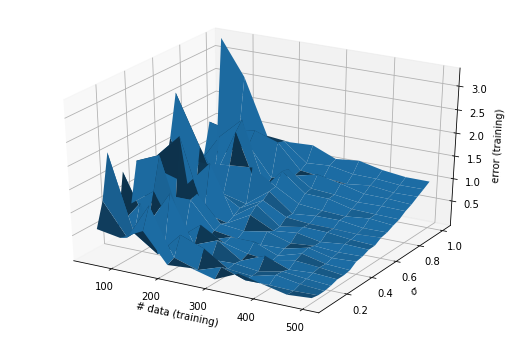

In [4]:
x = np.linspace(ntrain, ndata*ntrain, ndata)
y = np.linspace(sigma, nsigma*sigma, nsigma)

# create grid
X, Y = np.meshgrid(x, y)

# create figure container
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
# 3d contour plot
ax.plot_surface(X, Y, loss)
#ax.contour3D(X, Y, loss, 250, cmap = 'viridis')
# set labels
ax.set_xlabel('# data (training)')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('error (training)')

Text(0.5, 0, 'error (validation)')

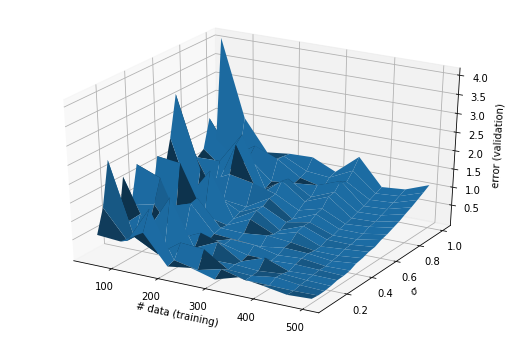

In [5]:
x = np.linspace(ntrain, ndata*ntrain, ndata)
y = np.linspace(sigma, nsigma*sigma, nsigma)

# create grid
X, Y = np.meshgrid(x, y)

# create figure container
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
# 3d contour plot
ax.plot_surface(X, Y, val_loss)
#ax.contour3D(X, Y, val_loss, 250, cmap = 'viridis')
#print(val_loss)
# set labels
ax.set_xlabel('# data (training)')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('error (validation)')

Text(0.5, 0, 'coefficiente angolare')

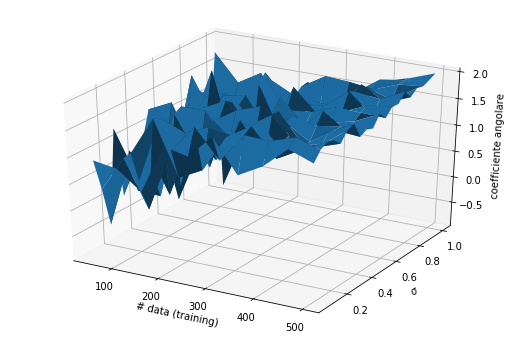

In [6]:
x = np.linspace(ntrain, ndata*ntrain, ndata)
y = np.linspace(sigma, nsigma*sigma, nsigma)

# create grid
X, Y = np.meshgrid(x, y)

# create figure container
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
# 3d contour plot
ax.plot_surface(X, Y, coeffang)
#ax.contour3D(X, Y, val_loss, 250, cmap = 'viridis')
#print(val_loss)
# set labels
ax.set_xlabel('# data (training)')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('coefficiente angolare')

Text(0.5, 0, 'bias')

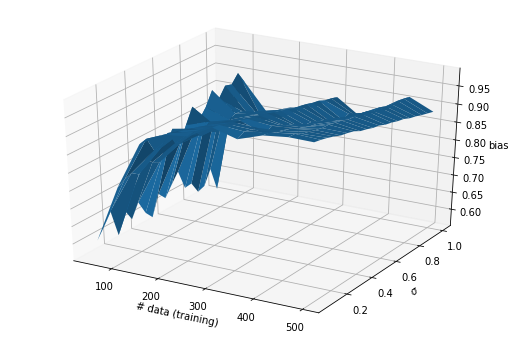

In [7]:
x = np.linspace(ntrain, ndata*ntrain, ndata)
y = np.linspace(sigma, nsigma*sigma, nsigma)

# create grid
X, Y = np.meshgrid(x, y)

# create figure container
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
# 3d contour plot
ax.plot_surface(X, Y, bias)
#ax.contour3D(X, Y, val_loss, 250, cmap = 'viridis')
#print(val_loss)
# set labels
ax.set_xlabel('# data (training)')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('bias')

Notiamo che gli errori diminuiscono, come d'altra parte ci potevame attendere, con l'aumentare del numero dei dati di training e con il ridursi della deviazione standard del rumore. Considerazioni analoghe si possono fare per le stime dei coefficienti della retta. Notiamo inotre come gli errori e i coefficienti siano più rumorosi quando il numero di dati di training è piccolo.

## Esercizio 11.2

La funzione proposta presenta due "gobbe" con segno della derivata seconda diverso nell'intervallo $[-1,1]$. Per questo ho pensato che il modello più semplice che potrebbe iniziare rappresentare più o meno efficacemente la funzione sia un modello a singolo layer con quattro neuroni (proprio per riprodurre due plateu).

In [8]:
nneurons_over_4 = 20
ntrain = 2000
nvalid = 200
sigma = 0.1
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
x_train2 = np.zeros(ntrain)
x_train3 = np.zeros(ntrain)
x_valid2 = np.zeros(nvalid)
x_valid3 = np.zeros(nvalid)

for i in range(ntrain):
    x_train2[i] = x_train[i]**2
    
for i in range(ntrain):
    x_train3[i] = x_train[i]**3
    
for i in range(nvalid):
    x_valid2[i] = x_valid[i]**2
    
for i in range(nvalid):
    x_valid3[i] = x_valid[i]**3
    
y_train = np.random.normal(4-3*x_train-2*x_train2+3*x_train3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4-3*x_valid-2*x_valid2+3*x_valid3, sigma)
y_target = 4-3*x_valid-2*x_valid2+3*x_valid3 # ideal (target) linear function

loss = np.zeros(nneurons_over_4)
val_loss = np.zeros(nneurons_over_4)
neurons = np.zeros(nneurons_over_4)

for i in range(nneurons_over_4):

    neurons[i] = 4*(i+1)
    model = Sequential()
    model.add(Dense(4*(i+1), input_shape=(1,), activation='relu'))
    model.add(Dense(1, activation='relu'))

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
        
    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=25, shuffle=True, validation_data=(x_valid, y_valid), verbose = 0)
    
    # evaluate model with the exact curve
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
    loss[i] = score[0]
    val_loss[i] = score[1]
    keras.backend.clear_session()


200/200 [==============================] - 0s 35us/sample - loss: 0.0841 - mean_squared_error: 0.0841


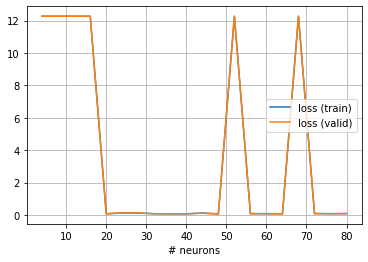

In [9]:
plt.plot(neurons, loss, label='loss (train)')
plt.plot(neurons, val_loss, label='loss (valid)')
plt.legend()
plt.xlabel('# neurons')
plt.grid(True)
plt.show()

Si osserva che ci sono punti in cui la loss vale circa 12, nei quali evidentemente l'algoritmo non converge correttamente. Ho provato a ripetere più volte il training per una singola rete senza nessun ciclo for, e ho notato che a volte l'algoritmo converge, altre volte no.

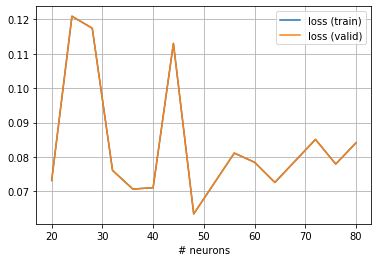

In [10]:
neurons_ = []
loss_ = []
val_loss_ = []

for i in range(np.size(neurons)):
    if loss[i]<5:
        neurons_.append(neurons[i])
        loss_.append(loss[i])
        val_loss_.append(val_loss[i])
        
plt.plot(neurons_, loss_, label='loss (train)')
plt.plot(neurons_, val_loss_, label='loss (valid)')
plt.legend()
plt.xlabel('# neurons')
plt.grid(True)
plt.show()

Eliminando i punti nei quali l'algoritmo non converge, vediamo che con un numero di neuroni maggiore di 10 la loss è circa costante e si attesta attorno a 0.07. Ora provo a aumentare il numero di layer mantenendo un numero basso di neuroni (20) per ogni layer al fine di confrontare come varia la loss rispetto al caso precedente in cui si variava il numero di neuroni.

In [11]:
nneurons = 20
nlayer = 20
_loss = np.zeros(nlayer)
_val_loss = np.zeros(nlayer)
layers = np.zeros(nlayer)
ntrain = 2000
nvalid = 200
sigma = 0.1

np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
x_train2 = np.zeros(ntrain)
x_train3 = np.zeros(ntrain)
x_valid2 = np.zeros(nvalid)
x_valid3 = np.zeros(nvalid)

for i in range(ntrain):
    x_train2[i] = x_train[i]**2
    
for i in range(ntrain):
    x_train3[i] = x_train[i]**3
    
for i in range(nvalid):
    x_valid2[i] = x_valid[i]**2
    
for i in range(nvalid):
    x_valid3[i] = x_valid[i]**3
    
y_train = np.random.normal(4-3*x_train-2*x_train2+3*x_train3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4-3*x_valid-2*x_valid2+3*x_valid3, sigma)
y_target = 4-3*x_valid-2*x_valid2+3*x_valid3 # ideal (target) linear function

for k in range(nlayer):
        
    layers[k] = k+1
    model = Sequential()
    model.add(Dense(nneurons, input_shape=(1,), activation='relu'))

    for i in range(nlayer-1):
        model.add(Dense(nneurons, activation='relu'))
    
    model.add(Dense(1, activation='relu'))

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    
    history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=25, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

    # evaluate model with the exact curve
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
    _loss[k] = score[0]    
    _val_loss[k] = score[1]
    keras.backend.clear_session()

200/200 [==============================] - 0s 60us/sample - loss: 12.2696 - mean_squared_error: 12.2696


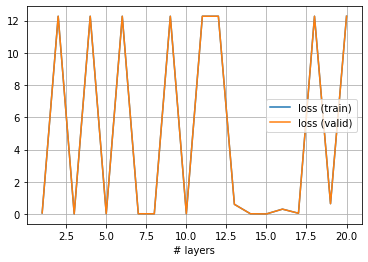

In [12]:
plt.plot(layers, _loss, label='loss (train)')
plt.plot(layers, _val_loss, label='loss (valid)')
plt.legend()
plt.grid(True)
plt.xlabel('# layers')
plt.show()

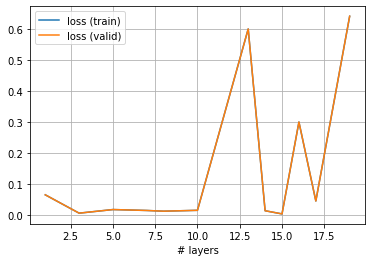

In [13]:
layers_ = []
loss_ = []
val_loss_ = []

for i in range(np.size(layers)):
    if _loss[i]<5:
        layers_.append(layers[i])
        loss_.append(_loss[i])
        val_loss_.append(_val_loss[i])
        
plt.plot(layers_, loss_, label='loss (train)')
plt.plot(layers_, val_loss_, label='loss (valid)')
plt.legend()
plt.xlabel('# layers')
plt.grid(True)
plt.show()

Anche in questo caso l'algoritmo non converge sempre correttamente, però quello che succede tipicamente è che la loss è inferiore rispetto al caso precedente. Di seguito provo, su una rete che so funzionare potenzialmente bene, a cambiare funzione di attivazione. Guarderò anche che cosa succede al di fuori dell'intervallo $[-1,1]$.

## Relu

In [189]:
nneurons = 40
layers = 5
ntrain = 2000
nvalid = 200
sigma = 0.3
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
x_train2 = np.zeros(ntrain)
x_train3 = np.zeros(ntrain)
x_valid2 = np.zeros(nvalid)
x_valid3 = np.zeros(nvalid)

for i in range(ntrain):
    x_train2[i] = x_train[i]**2
    
for i in range(ntrain):
    x_train3[i] = x_train[i]**3
    
for i in range(nvalid):
    x_valid2[i] = x_valid[i]**2
    
for i in range(nvalid):
    x_valid3[i] = x_valid[i]**3
    
y_train = np.random.normal(4-3*x_train-2*x_train2+3*x_train3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4-3*x_valid-2*x_valid2+3*x_valid3, sigma)
y_target = 4-3*x_valid-2*x_valid2+3*x_valid3 # ideal (target) linear function

model = Sequential()
model.add(Dense(nneurons, input_shape=(1,), activation='relu'))
model.add(Dense(nneurons, activation='relu'))
model.add(Dense(nneurons, activation='relu'))
model.add(Dense(nneurons, activation='relu'))
model.add(Dense(1, activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
        
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=25, shuffle=True, validation_data=(x_valid, y_valid), verbose = 0)
    
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

x = np.linspace(-1.5, 1.5, npoints)
z_predicted = model.predict(x)
keras.backend.clear_session()

200/200 [==============================] - 0s 35us/sample - loss: 0.0068 - mean_squared_error: 0.0068


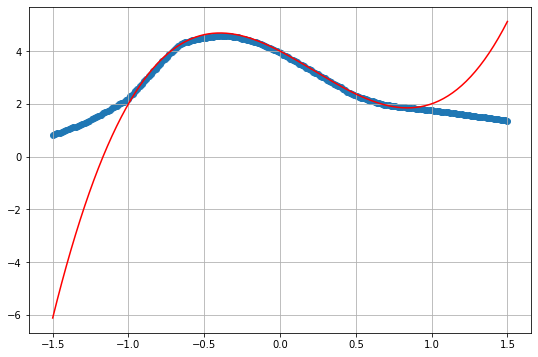

In [190]:
npoints = 200
z = np.zeros((npoints,1))

for i in range(npoints):
    z[i] = (4-3*x[i]-2*x[i]**2+3*x[i]**3)

# create figure container
fig = plt.figure(figsize=(9, 6))
plt.scatter(x, z_predicted)
plt.plot(x,z,color='r')
plt.grid(True)

## Softplus

In [191]:
nneurons = 40
layers = 5
ntrain = 2000
nvalid = 200
sigma = 0.3
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
x_train2 = np.zeros(ntrain)
x_train3 = np.zeros(ntrain)
x_valid2 = np.zeros(nvalid)
x_valid3 = np.zeros(nvalid)

for i in range(ntrain):
    x_train2[i] = x_train[i]**2
    
for i in range(ntrain):
    x_train3[i] = x_train[i]**3
    
for i in range(nvalid):
    x_valid2[i] = x_valid[i]**2
    
for i in range(nvalid):
    x_valid3[i] = x_valid[i]**3
    
y_train = np.random.normal(4-3*x_train-2*x_train2+3*x_train3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4-3*x_valid-2*x_valid2+3*x_valid3, sigma)
y_target = 4-3*x_valid-2*x_valid2+3*x_valid3 # ideal (target) linear function

model = Sequential()
model.add(Dense(nneurons, input_shape=(1,), activation='softplus'))
model.add(Dense(nneurons, activation='softplus'))
model.add(Dense(nneurons, activation='softplus'))
model.add(Dense(nneurons, activation='softplus'))
model.add(Dense(1, activation='softplus'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
        
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=25, shuffle=True, validation_data=(x_valid, y_valid), verbose = 0)
    
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

x = np.linspace(-1.5, 1.5, npoints)
z_predicted = model.predict(x)
keras.backend.clear_session()

200/200 [==============================] - 0s 35us/sample - loss: 0.5417 - mean_squared_error: 0.5417


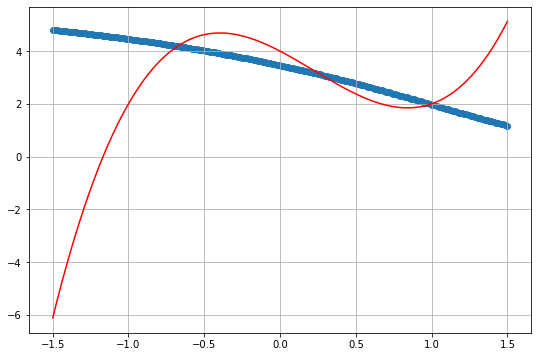

In [192]:
npoints = 200
z = np.zeros((npoints,1))

for i in range(npoints):
    z[i] = (4-3*x[i]-2*x[i]**2+3*x[i]**3)

# create figure container
fig = plt.figure(figsize=(9, 6))
plt.scatter(x, z_predicted)
plt.plot(x,z,color='r')
plt.grid(True)

## Selu

In [193]:
nneurons = 40
layers = 5
ntrain = 2000
nvalid = 200
sigma = 0.3
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
x_train2 = np.zeros(ntrain)
x_train3 = np.zeros(ntrain)
x_valid2 = np.zeros(nvalid)
x_valid3 = np.zeros(nvalid)

for i in range(ntrain):
    x_train2[i] = x_train[i]**2
    
for i in range(ntrain):
    x_train3[i] = x_train[i]**3
    
for i in range(nvalid):
    x_valid2[i] = x_valid[i]**2
    
for i in range(nvalid):
    x_valid3[i] = x_valid[i]**3
    
y_train = np.random.normal(4-3*x_train-2*x_train2+3*x_train3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4-3*x_valid-2*x_valid2+3*x_valid3, sigma)
y_target = 4-3*x_valid-2*x_valid2+3*x_valid3 # ideal (target) linear function

model = Sequential()
model.add(Dense(nneurons, input_shape=(1,), activation='selu'))
model.add(Dense(nneurons, activation='selu'))
model.add(Dense(nneurons, activation='selu'))
model.add(Dense(nneurons, activation='selu'))
model.add(Dense(1, activation='selu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
        
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=25, shuffle=True, validation_data=(x_valid, y_valid), verbose = 0)
    
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

x = np.linspace(-1.5, 1.5, npoints)
z_predicted = model.predict(x)
keras.backend.clear_session()

200/200 [==============================] - 0s 40us/sample - loss: 0.0165 - mean_squared_error: 0.0165


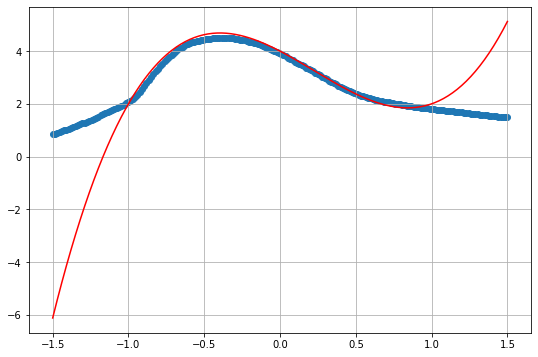

In [194]:
npoints = 200
z = np.zeros((npoints,1))

for i in range(npoints):
    z[i] = (4-3*x[i]-2*x[i]**2+3*x[i]**3)

# create figure container
fig = plt.figure(figsize=(9, 6))
plt.scatter(x, z_predicted)
plt.plot(x,z,color='r')
plt.grid(True)

La funzione di attivazione migliore risulta essere la 'relu'. Noto inoltre che in nessun caso le predizioni sono buone al di fuori dell'intervallo di x per il quale la rete è stata trainata. Di seguito provo a cambiare la loss function:

## Mean Squared Logarithmic Error

In [197]:
nneurons = 40
layers = 5
ntrain = 2000
nvalid = 200
sigma = 0.3
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
x_train2 = np.zeros(ntrain)
x_train3 = np.zeros(ntrain)
x_valid2 = np.zeros(nvalid)
x_valid3 = np.zeros(nvalid)

for i in range(ntrain):
    x_train2[i] = x_train[i]**2
    
for i in range(ntrain):
    x_train3[i] = x_train[i]**3
    
for i in range(nvalid):
    x_valid2[i] = x_valid[i]**2
    
for i in range(nvalid):
    x_valid3[i] = x_valid[i]**3
    
y_train = np.random.normal(4-3*x_train-2*x_train2+3*x_train3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4-3*x_valid-2*x_valid2+3*x_valid3, sigma)
y_target = 4-3*x_valid-2*x_valid2+3*x_valid3 # ideal (target) linear function

model = Sequential()
model.add(Dense(nneurons, input_shape=(1,), activation='relu'))
model.add(Dense(nneurons, activation='relu'))
model.add(Dense(nneurons, activation='relu'))
model.add(Dense(nneurons, activation='relu'))
model.add(Dense(1, activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='MSLE', metrics=['mse'])
        
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=25, shuffle=True, validation_data=(x_valid, y_valid), verbose = 0)
    
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

x = np.linspace(-1.5, 1.5, npoints)
z_predicted = model.predict(x)
keras.backend.clear_session()

200/200 [==============================] - 0s 45us/sample - loss: 0.0195 - mean_squared_error: 0.3996


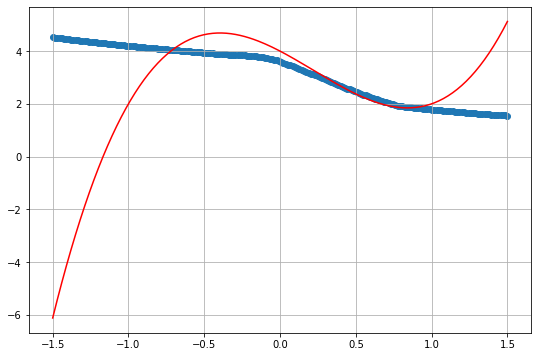

In [198]:
npoints = 200
z = np.zeros((npoints,1))

for i in range(npoints):
    z[i] = (4-3*x[i]-2*x[i]**2+3*x[i]**3)

# create figure container
fig = plt.figure(figsize=(9, 6))
plt.scatter(x, z_predicted)
plt.plot(x,z,color='r')
plt.grid(True)

## Logcosh

In [199]:
nneurons = 40
layers = 5
ntrain = 2000
nvalid = 200
sigma = 0.3
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
x_train2 = np.zeros(ntrain)
x_train3 = np.zeros(ntrain)
x_valid2 = np.zeros(nvalid)
x_valid3 = np.zeros(nvalid)

for i in range(ntrain):
    x_train2[i] = x_train[i]**2
    
for i in range(ntrain):
    x_train3[i] = x_train[i]**3
    
for i in range(nvalid):
    x_valid2[i] = x_valid[i]**2
    
for i in range(nvalid):
    x_valid3[i] = x_valid[i]**3
    
y_train = np.random.normal(4-3*x_train-2*x_train2+3*x_train3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4-3*x_valid-2*x_valid2+3*x_valid3, sigma)
y_target = 4-3*x_valid-2*x_valid2+3*x_valid3 # ideal (target) linear function

model = Sequential()
model.add(Dense(nneurons, input_shape=(1,), activation='relu'))
model.add(Dense(nneurons, activation='relu'))
model.add(Dense(nneurons, activation='relu'))
model.add(Dense(nneurons, activation='relu'))
model.add(Dense(1, activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='logcosh', metrics=['mse'])
        
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=25, shuffle=True, validation_data=(x_valid, y_valid), verbose = 0)
    
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

x = np.linspace(-1.5, 1.5, npoints)
z_predicted = model.predict(x)
keras.backend.clear_session()

200/200 [==============================] - 0s 33us/sample - loss: 0.0061 - mean_squared_error: 0.0125


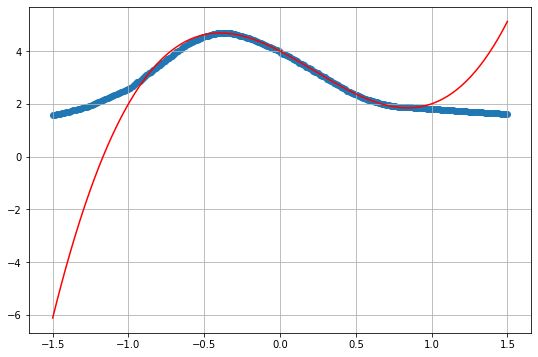

In [200]:
npoints = 200
z = np.zeros((npoints,1))

for i in range(npoints):
    z[i] = (4-3*x[i]-2*x[i]**2+3*x[i]**3)

# create figure container
fig = plt.figure(figsize=(9, 6))
plt.scatter(x, z_predicted)
plt.plot(x,z,color='r')
plt.grid(True)

## Mean Absolute Error

In [201]:
nneurons = 40
layers = 5
ntrain = 2000
nvalid = 200
sigma = 0.3
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
x_train2 = np.zeros(ntrain)
x_train3 = np.zeros(ntrain)
x_valid2 = np.zeros(nvalid)
x_valid3 = np.zeros(nvalid)

for i in range(ntrain):
    x_train2[i] = x_train[i]**2
    
for i in range(ntrain):
    x_train3[i] = x_train[i]**3
    
for i in range(nvalid):
    x_valid2[i] = x_valid[i]**2
    
for i in range(nvalid):
    x_valid3[i] = x_valid[i]**3
    
y_train = np.random.normal(4-3*x_train-2*x_train2+3*x_train3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4-3*x_valid-2*x_valid2+3*x_valid3, sigma)
y_target = 4-3*x_valid-2*x_valid2+3*x_valid3 # ideal (target) linear function

model = Sequential()
model.add(Dense(nneurons, input_shape=(1,), activation='relu'))
model.add(Dense(nneurons, activation='relu'))
model.add(Dense(nneurons, activation='relu'))
model.add(Dense(nneurons, activation='relu'))
model.add(Dense(1, activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='MAE', metrics=['mse'])
        
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=25, shuffle=True, validation_data=(x_valid, y_valid), verbose = 0)
    
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

x = np.linspace(-1.5, 1.5, npoints)
z_predicted = model.predict(x)
keras.backend.clear_session()

200/200 [==============================] - 0s 41us/sample - loss: 0.0638 - mean_squared_error: 0.0101


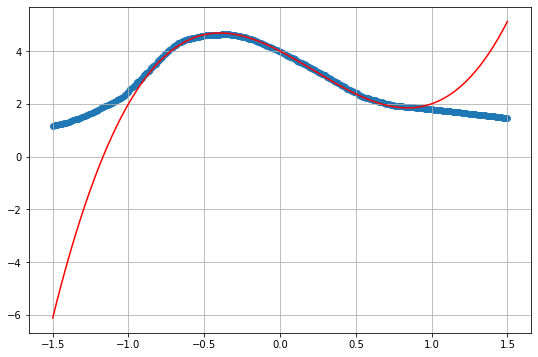

In [202]:
npoints = 200
z = np.zeros((npoints,1))

for i in range(npoints):
    z[i] = (4-3*x[i]-2*x[i]**2+3*x[i]**3)

# create figure container
fig = plt.figure(figsize=(9, 6))
plt.scatter(x, z_predicted)
plt.plot(x,z,color='r')
plt.grid(True)

Riassumo le mie osservazioni: la MSLE non funziona particolarmente bene, probabilmente perché in questo esercizio non entrano in gioco numeri grandi o in generale delle grandi differenze nelle discrepanze fra le previsioni e e i dati. Logcosh e MAE producono invece dei buoni risultati, molto simili a quelli ottenuti in precedenza facendo uso della MSE. In effetti sul set di dati in questione che è molto semplice, e nel quale non ci sono outlayers e gli errori commessi sono circa costanti in tutto l'intervallo di training. Provo infine a cambiare l'ottimizzatore.

## Adagrad

In [203]:
nneurons = 40
layers = 5
ntrain = 2000
nvalid = 200
sigma = 0.3
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
x_train2 = np.zeros(ntrain)
x_train3 = np.zeros(ntrain)
x_valid2 = np.zeros(nvalid)
x_valid3 = np.zeros(nvalid)

for i in range(ntrain):
    x_train2[i] = x_train[i]**2
    
for i in range(ntrain):
    x_train3[i] = x_train[i]**3
    
for i in range(nvalid):
    x_valid2[i] = x_valid[i]**2
    
for i in range(nvalid):
    x_valid3[i] = x_valid[i]**3
    
y_train = np.random.normal(4-3*x_train-2*x_train2+3*x_train3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4-3*x_valid-2*x_valid2+3*x_valid3, sigma)
y_target = 4-3*x_valid-2*x_valid2+3*x_valid3 # ideal (target) linear function

model = Sequential()
model.add(Dense(nneurons, input_shape=(1,), activation='relu'))
model.add(Dense(nneurons, activation='relu'))
model.add(Dense(nneurons, activation='relu'))
model.add(Dense(nneurons, activation='relu'))
model.add(Dense(1, activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adagrad', loss='MAE', metrics=['mse'])
        
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=25, shuffle=True, validation_data=(x_valid, y_valid), verbose = 0)
    
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

x = np.linspace(-1.5, 1.5, npoints)
z_predicted = model.predict(x)
keras.backend.clear_session()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
200/200 [==============================] - 0s 35us/sample - loss: 0.3298 - mean_squared_error: 0.3531


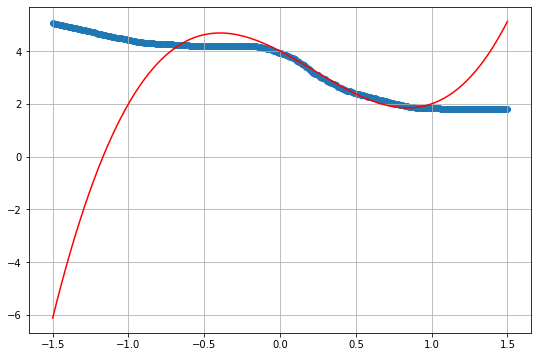

In [204]:
npoints = 200
z = np.zeros((npoints,1))

for i in range(npoints):
    z[i] = (4-3*x[i]-2*x[i]**2+3*x[i]**3)

# create figure container
fig = plt.figure(figsize=(9, 6))
plt.scatter(x, z_predicted)
plt.plot(x,z,color='r')
plt.grid(True)

## Adadelta

In [209]:
nneurons = 40
layers = 5
ntrain = 2000
nvalid = 200
sigma = 0.3
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
x_train2 = np.zeros(ntrain)
x_train3 = np.zeros(ntrain)
x_valid2 = np.zeros(nvalid)
x_valid3 = np.zeros(nvalid)

for i in range(ntrain):
    x_train2[i] = x_train[i]**2
    
for i in range(ntrain):
    x_train3[i] = x_train[i]**3
    
for i in range(nvalid):
    x_valid2[i] = x_valid[i]**2
    
for i in range(nvalid):
    x_valid3[i] = x_valid[i]**3
    
y_train = np.random.normal(4-3*x_train-2*x_train2+3*x_train3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4-3*x_valid-2*x_valid2+3*x_valid3, sigma)
y_target = 4-3*x_valid-2*x_valid2+3*x_valid3 # ideal (target) linear function

model = Sequential()
model.add(Dense(nneurons, input_shape=(1,), activation='relu'))
model.add(Dense(nneurons, activation='relu'))
model.add(Dense(nneurons, activation='relu'))
model.add(Dense(nneurons, activation='relu'))
model.add(Dense(1, activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adadelta', loss='MAE', metrics=['mse'])
        
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=25, shuffle=True, validation_data=(x_valid, y_valid), verbose = 0)
    
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

x = np.linspace(-1.5, 1.5, npoints)
z_predicted = model.predict(x)
keras.backend.clear_session()

200/200 [==============================] - 0s 35us/sample - loss: 3.2669 - mean_squared_error: 11.7996


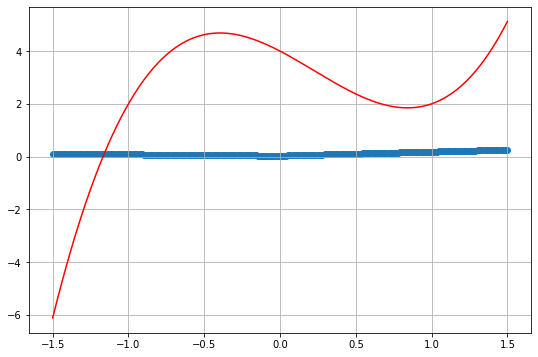

In [210]:
npoints = 200
z = np.zeros((npoints,1))

for i in range(npoints):
    z[i] = (4-3*x[i]-2*x[i]**2+3*x[i]**3)

# create figure container
fig = plt.figure(figsize=(9, 6))
plt.scatter(x, z_predicted)
plt.plot(x,z,color='r')
plt.grid(True)

Adagrad sembra funzionare meglio di Adadelta, e in generale l'ottimizzatore che ha portato a risultati migliori è SGD.

## Esercizio11.3

Di seguito ho generalizzato il codice per fittare la superficie proposta.

In [250]:
keras.backend.clear_session()

sigma = 0.1 # noise standard deviation, for the moment it is absent
ntrain = 5000
nvalid = 500
nneurons = 200

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(2,)))
model.add(Dense(nneurons, activation='selu'))
model.add(Dense(nneurons, activation='selu'))
model.add(Dense(nneurons, activation='selu'))
model.add(Dense(nneurons, activation='selu'))

model.add(Dense(1, activation='selu'))

#opt = keras.optimizers.Adam(learning_rate=0.00000001)
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
        
n_train = 5000
n_valid = 500
# generate synthetic training dataset
x_train = np.zeros((n_train, 2))
z_train = np.zeros((n_train, 1))
# generate synthetic validation data
x_valid = np.zeros((n_valid, 2))
z_valid = np.zeros((n_valid, 1))
z_target = np.zeros((n_valid, 1))

sigma = 0.1

for i in range(n_train):
    x_train[i,0] = np.random.uniform(-1.5, 1.5)
    x_train[i,1] = np.random.uniform(-1.5, 1.5)

for i in range(n_valid):
    x_valid[i,0] = np.random.uniform(-1.5, 1.5)
    x_valid[i,1] = np.random.uniform(-1.5, 1.5)
    
for i in range(n_train):
    z_train[i] = np.random.normal(np.sin(x_train[i,0]**2+x_train[i,1]**2), sigma) # actual measures from which we want to guess regression parameters

for i in range(n_valid):
    z_valid[i] = np.random.normal(np.sin(x_valid[i,0]**2+x_valid[i,1]**2), sigma)
    z_target[i] = np.sin(x_valid[i,0]**2+x_valid[i,1]**2)

bsize = 32

history = model.fit(x=x_train, y=z_train, 
          batch_size=bsize, epochs=80, 
          validation_data=(x_valid, z_valid))

npoints = 500

x = np.linspace(-1.5, 1.5, npoints)
y = np.linspace(-1.5, 1.5, npoints)
z = np.zeros((npoints,npoints))

xy = np.zeros((npoints, 2))
for i in range(npoints):
    xy[i,0] = np.random.uniform(-1.5, 1.5)
    xy[i,1] = np.random.uniform(-1.5, 1.5)

for i in range(npoints):
    for j in range(npoints):
        z[i][j] = (np.sin(x[i]**2+y[j]**2))

z_predicted = model.predict(xy)

keras.backend.clear_session()

Train on 5000 samples, validate on 500 samples
Epoch 1/80
5000/5000 [==============================] - 1s 145us/sample - loss: 0.2582 - mean_squared_error: 0.2582 - val_loss: 0.1171 - val_mean_squared_error: 0.1171
Epoch 2/80
5000/5000 [==============================] - 1s 114us/sample - loss: 0.1276 - mean_squared_error: 0.1276 - val_loss: 0.4227 - val_mean_squared_error: 0.4227
Epoch 3/80
5000/5000 [==============================] - 1s 117us/sample - loss: 0.1324 - mean_squared_error: 0.1324 - val_loss: 0.1081 - val_mean_squared_error: 0.1081
Epoch 4/80
5000/5000 [==============================] - 1s 115us/sample - loss: 0.1241 - mean_squared_error: 0.1241 - val_loss: 0.1126 - val_mean_squared_error: 0.1126
Epoch 5/80
5000/5000 [==============================] - 1s 119us/sample - loss: 0.1193 - mean_squared_error: 0.1193 - val_loss: 0.1039 - val_mean_squared_error: 0.1039
Epoch 6/80
5000/5000 [==============================] - 1s 126us/sample - loss: 0.1160 - mean_squared_error: 0.11

Il seguente specchietto python apre una figura interattiva per visualizzare i punti predetti dalla mia rete

In [251]:
%matplotlib qt

# create grid
X, Y = np.meshgrid(x, y)

# create figure container
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
# 3d contour plot
#ax.scatter3D(x_valid[:,0], x_valid[:,1], z_valid, color = "green")
ax.plot_surface(X, Y, z)
ax.scatter3D(xy[:,0],xy[:,1], z_predicted,color='r')
ax.set_xlabel('# data (training)')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('bias')


Text(0.5, 0, 'bias')

Notiamo che la rete non è riuscita a ricostruire correttamente tutte le caratteristiche della superficie target.